In [9]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [10]:
df = {}
for i in range(8):
    if i < 4:
        df[i] = pd.read_table('nat_200'+str(i+6)+'.csv',sep=',')
    else:
        df[i] = pd.read_table('nat_20'+str(i+6)+'.csv',sep=',')
    df[i] = df[i][0:8]
    df[i] = df[i].reindex(df[i].index.delete(4)).reset_index()

print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape


(7, 59) (7, 59) (7, 59) (7, 59) (7, 59) (7, 59) (7, 59) (7, 59)


In [11]:
df[0]

,index,Unnamed: 0,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,U.S. Armed Services Posts,U.S. Dependencies,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unknown
0,0,Total,702589,1946,831,9707,1133,152836,5526,7231,...,NaN,2893,2740,569,20401,12762,390,3247,NaN,8313
1,1,Africa,50397,156,26,528,55,4206,597,467,...,0,16,192,52,3012,1042,29,206,9,629
2,2,Asia,257125,983,419,2437,391,77511,1671,2138,...,0,910,685,164,9704,5864,198,1383,38,2882
3,3,Europe,107459,326,159,1595,106,13246,1212,1967,...,NaN,86,607,240,2323,3258,75,919,NaN,1356
4,5,Northern America,44231,86,58,351,34,1681,197,459,...,0,1295,110,80,600,486,17,87,22,357
5,6,Oceania,3657,10,27,67,NaN,1531,63,20,...,0,13,91,0,62,205,3,10,4,29
6,7,Latin America,238840,381,140,4720,539,54589,1777,2175,...,0,568,1052,33,4670,1895,68,632,43,2961


In [12]:
df[1]

,index,Unnamed: 0,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,U.S. Armed Services Posts,U.S. Dependencies,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Unknown
0,0,Total,660477,1343,849,12091,1214,181684,7829,4552,...,NaN,3216,2777,468,14171,14671,310,4485,NaN,6030
1,1,Africa,41652,122,31,567,52,3855,784,268,...,0,23,139,40,1934,1078,29,255,6,485
2,2,Asia,238797,617,419,2733,375,81705,2245,1458,...,NaN,1109,622,136,6825,6354,157,1806,NaN,2101
3,3,Europe,86742,179,165,1516,94,13265,1420,1186,...,0,89,477,198,1492,3724,54,991,39,764
4,5,Northern America,37831,64,63,367,33,1762,218,331,...,0,1434,118,65,416,538,18,139,15,339
5,6,Oceania,3342,5,33,63,8,1565,50,14,...,0,20,97,6,63,209,3,21,NaN,50
6,7,Latin America,251465,356,138,6841,649,79474,3107,1294,...,0,535,1323,23,3435,2765,49,1267,81,2245


In [13]:
def clean(x):
    try:
        return int(x)
    except:
        pass

for i in range(8):
    df[i].fillna(0)
    pd.to_numeric(df[i],errors='ignore')

In [14]:
def line_plot(data,title,xlabel,ylabel,xticks,legend):
    plt.figure(figsize=(15,11))
    xvals = 0
    p = {}
    for i,val in enumerate(data):
        xvals = np.arange(len(val))
        p[i] = plt.plot(np.arange(len(val)),val)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)
    plt.xticks(xvals,xticks,fontsize=12)
    legend1 = [p[i][0] for i in p]
    plt.legend(legend1,legend,fontsize=12,loc=0)
    
    import matplotlib.ticker as tkr
    formatter = tkr.ScalarFormatter(useMathText=False)
    formatter.set_scientific(False)
    
    plt.show()
    
# xticks = ('2006','2007','2008','2009','2010','2011','2012','2013','2014')
# legend = ('Asia','Europe','Latin America','Africa','Northern America','Oceania')
# title= 'Unemployment Rate from 2006-2014'
# ylabel = 'Percentage of Group\'s Workforce'
# xlabel = 'Years'

# line_plot([unemployment_asia,unemployment_europe,unemployment_latin_america,unemployment_africa,unemployment_northern_america,unemployment_oceania],title,xlabel,ylabel,xticks,legend)

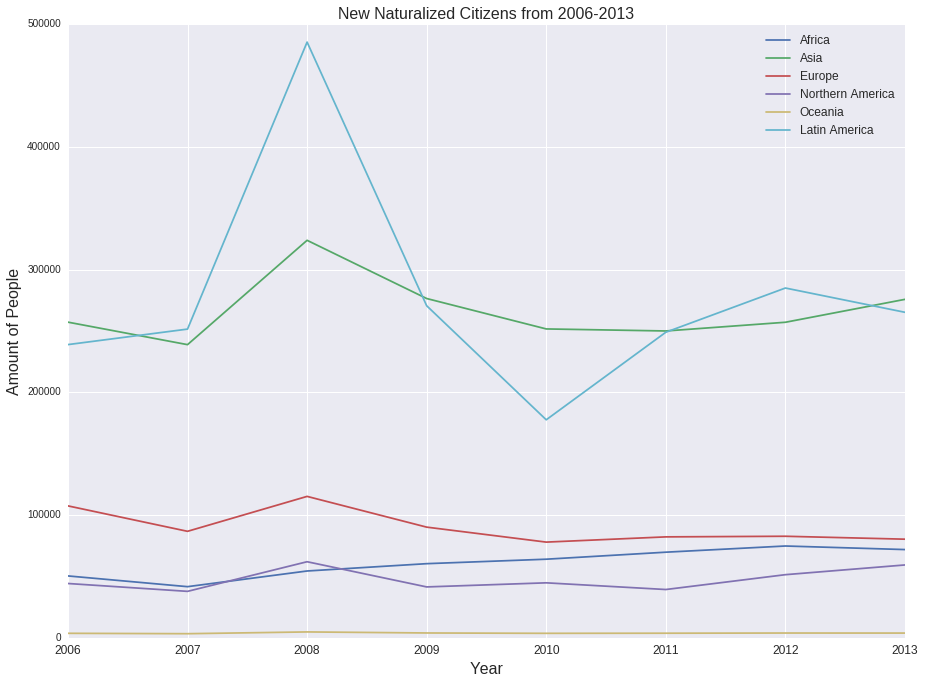

In [15]:
plt.figure(figsize=(15,11))
total_africa = [df[i]['Total'].loc[1] for i in range(8)]
total_asia = [df[i]['Total'].loc[2] for i in range(8)]
total_europe = [df[i]['Total'].loc[3] for i in range(8)]
total_north = [df[i]['Total'].loc[4] for i in range(8)]
total_oceania = [df[i]['Total'].loc[5] for i in range(8)]
total_latin = [df[i]['Total'].loc[6] for i in range(8)]
xticks = ('2006','2007','2008','2009','2010','2011','2012','2013')
legend = ('Africa','Asia','Europe','Northern America','Oceania','Latin America')

line_plot([total_africa,total_asia,total_europe,total_north,total_oceania,total_latin],'New Naturalized Citizens from 2006-2013','Year','Amount of People',xticks,legend)

In [34]:
years_change = defaultdict(dict)
for data in df.keys():
    for col in df[data].columns:  
        if col == 'index' or col == 'Origin':
            continue
        else:
            try:
                years_change[data][col] = df[data].nlargest(4, col)[col].to_dict()
            except:
                print data,col
years_change

0 Unnamed: 0
1 Unnamed: 0
2 Unnamed: 0
3 Unnamed: 0
4 Unnamed: 0
5 Unnamed: 0
6 Unnamed: 0
7 Unnamed: 0


defaultdict(<type 'dict'>, {0: {'Mississippi': {0: 495.0, 2: 272.0, 3: 59.0, 6: 94.0}, 'South Dakota': {0: 342.0, 1: 120.0, 2: 52.0, 3: 106.0}, 'Unknown': {0: 8313, 2: 2882, 3: 1356, 6: 2961}, 'Oklahoma': {0: 2246.0, 1: 222.0, 2: 961.0, 6: 777.0}, 'Delaware': {0: 1187.0, 2: 492.0, 3: 155.0, 6: 315.0}, 'Minnesota': {0: 9137.0, 1: 3569.0, 2: 3262.0, 3: 1204.0}, 'Illinois': {0: 30156.0, 2: 10745.0, 3: 8911.0, 6: 8586.0}, 'Arkansas': {0: 1133.0, 2: 391.0, 3: 106.0, 6: 539.0}, 'New Mexico': {0: 1538.0, 2: 385.0, 3: 200.0, 6: 854.0}, 'Indiana': {0: 3885.0, 2: 1564.0, 3: 798.0, 6: 959.0}, 'Maryland': {0: 14465.0, 1: 3149.0, 2: 5787.0, 6: 3132.0}, 'Louisiana': {0: 1336.0, 2: 660.0, 3: 136.0, 6: 377.0}, 'Idaho': {0: 980.0, 2: 176.0, 3: 349.0, 6: 374.0}, 'Wyoming': {1: 9.0, 2: 38.0, 4: 22.0, 6: 43.0}, 'Tennessee': {0: 3334.0, 1: 608.0, 2: 1488.0, 6: 555.0}, 'Arizona': {0: 9707.0, 2: 2437.0, 3: 1595.0, 6: 4720.0}, 'Iowa': {0: 805.0, 2: 245.0, 3: 231.0, 6: 262.0}, 'Michigan': {0: 11675.0, 2: 6314.

In [35]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

In [36]:
origin = {0:'Total',1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}

top_groups = defaultdict(list)
top_group_val = defaultdict(list)
    
for i in range(8):
    for ab,state in states.iteritems():
        groups = dict()
        for place in years_change[i][state]:
            groups[origin[place]] = years_change[i][state][place]
        group_key = sorted(groups,key=groups.get,reverse=True)
        group_val = [groups[key] for key in group_key]
        top_groups[state].append(group_key)
        top_group_val[state].append(dict(zip(group_key,group_val)))
        
top_groups

defaultdict(<type 'list'>, {'Mississippi': [['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Europe']], 'Oklahoma': [['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Latin America', 'Asia', 'Europe'], ['Total', 'Latin America', 'Asia', 'Europe'], ['Total', 'Asia', 'Latin America', 'Europe'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa'], ['Total', 'Asia', 'Latin America', 'Africa']], 'Wyoming': [['Latin America', 'Asia', 'Northern America', 'Africa'], ['Latin America', 'Europe', 'Northern America', 'Africa'], ['Total', 'Latin America', 'Asia', 'Europe'], ['Total', 'Latin America', 'Asi

In [37]:
df_temp = {}
group_years_change = defaultdict(dict)
for data in df.keys():
    df_temp[data] = df[data].transpose()[2:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df_temp[data].columns = ['Total','Africa','Asia','Europe','Northern America','Oceania','Latin America']
    for col in df_temp[data].columns:
        group_years_change[data][col] = df_temp[data].nlargest(6, col)[col].to_dict()
#group_years_change

In [38]:
african = []
asian = []
european = []
northern = []
oceanic = []
latin = []
total = []
for i in range(8):
    asian.append(group_years_change[i]['Asia'])
    african.append(group_years_change[i]['Africa'])
    european.append(group_years_change[i]['Europe'])
    northern.append(group_years_change[i]['Northern America'])
    oceanic.append(group_years_change[i]['Oceania'])
    latin.append(group_years_change[i]['Latin America'])
    total.append(group_years_change[i]['Total'])

tot_asia = []
tot_africa = []
tot_europe = []
tot_north = []
tot_oceania = []
tot_latin = []
tot_tot = []
    
for i in range(8):
    tot_asia.append(sorted(asian[i],key=asian[i].get,reverse=True))
    tot_africa.append(sorted(african[i],key=african[i].get,reverse=True))
    tot_europe.append(sorted(european[i],key=european[i].get,reverse=True))
    tot_north.append(sorted(northern[i],key=northern[i].get,reverse=True))
    tot_oceania.append(sorted(oceanic[i],key=oceanic[i].get,reverse=True))
    tot_latin.append(sorted(latin[i],key=latin[i].get,reverse=True))
    tot_tot.append(sorted(total[i],key=total[i].get,reverse=True))


In [39]:
print 'Asia:'
#tot_asia
asia = []
for year,states in enumerate(tot_asia):
    year_num = []
    for state in states:
        year_num.append((state,group_years_change[year]['Asia'][state]))
    asia.append(year_num)
asia

Asia:


[[('Total', 257125.0),
  ('California', 77511.0),
  ('New York', 31154.0),
  ('New Jersey', 15026.0),
  ('Texas', 14120.0),
  ('Illinois', 10745.0)],
 [('Total', 238797.0),
  ('California', 81705.0),
  ('New York', 21361.0),
  ('Texas', 17009.0),
  ('New Jersey', 13873.0),
  ('Illinois', 12833.0)],
 [('Total', 323792.0),
  ('California', 109898.0),
  ('New Jersey', 21870.0),
  ('New York', 21542.0),
  ('Texas', 21272.0),
  ('Virginia', 14218.0)],
 [('Total', 276375.0),
  ('California', 86570.0),
  ('New York', 29730.0),
  ('Texas', 18451.0),
  ('New Jersey', 13846.0),
  ('Virginia', 11703.0)],
 [('Total', 251598.0),
  ('California', 74328.0),
  ('New York', 24931.0),
  ('Texas', 19631.0),
  ('New Jersey', 14194.0),
  ('Illinois', 10780.0)],
 [('Total', 249940.0),
  ('California', 78467.0),
  ('New York', 26220.0),
  ('Texas', 17671.0),
  ('New Jersey', 12553.0),
  ('Illinois', 10616.0)],
 [('Total', 257035.0),
  ('California', 81444.0),
  ('New York', 29363.0),
  ('Texas', 18063.0),
  

In [40]:
print 'Africa:'
tot_africa

Africa:


[['Total', 'New York', 'California', 'Minnesota', 'Georgia', 'Maryland'],
 ['Total', 'California', 'New York', 'Texas', 'Minnesota', 'Massachusetts'],
 ['Total', 'California', 'Maryland', 'Texas', 'Virginia', 'New York'],
 ['Total', 'California', 'New York', 'Texas', 'Maryland', 'Virginia'],
 ['Total', 'California', 'Texas', 'Maryland', 'New York', 'Minnesota'],
 ['Total', 'New York', 'California', 'Texas', 'Minnesota', 'Maryland'],
 ['Total', 'New York', 'Minnesota', 'Texas', 'California', 'Maryland'],
 ['Total', 'New York', 'California', 'Texas', 'Maryland', 'Minnesota']]

In [41]:
print 'Europe:'
tot_europe

Europe:


[['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'California', 'New York', 'Illinois', 'New Jersey', 'Florida'],
 ['Total', 'California', 'New York', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'California', 'New York', 'Illinois', 'Florida', 'New Jersey']]

In [42]:
print 'Northern America:'
tot_north

Northern America:


[['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total', 'New York', 'Florida', 'New Jersey', 'Massachusetts', 'California'],
 ['Total',
  'New York',
  'New Jersey',
  'Florida',
  'Massachusetts',
  'Pennsylvania'],
 ['Total',
  'New York',
  'Florida',
  'New Jersey',
  'Massachusetts',
  'Pennsylvania']]

In [43]:
print 'Oceania:'
tot_oceania

Oceania:


[['Total', 'California', 'Hawaii', 'Washington', 'New York', 'Texas'],
 ['Total', 'California', 'Washington', 'Hawaii', 'Texas', 'New York'],
 ['Total', 'California', 'Washington', 'Hawaii', 'Utah', 'Texas'],
 ['Total', 'California', 'Washington', 'Hawaii', 'New York', 'Virginia'],
 ['Total', 'California', 'Washington', 'Hawaii', 'Texas', 'New York'],
 ['Total', 'California', 'Washington', 'Texas', 'Hawaii', 'New York'],
 ['Total', 'California', 'Washington', 'Texas', 'Utah', 'New York'],
 ['Total', 'California', 'Texas', 'New York', 'Hawaii', 'Florida']]

In [44]:
print 'Latin America:'
tot_latin

Latin America:


[['Total', 'Florida', 'California', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'California', 'Florida', 'Texas', 'New York', 'Illinois'],
 ['Total', 'California', 'Florida', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'California', 'Florida', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'Florida', 'California', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'Florida', 'California', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'Florida', 'California', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'Florida', 'California', 'Texas', 'New York', 'New Jersey']]

In [45]:
print 'Total:'
tot_tot

Total:


[['Total', 'California', 'New York', 'Florida', 'New Jersey', 'Texas'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'Illinois'],
 ['Total', 'California', 'Florida', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'Florida', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'California', 'Florida', 'New York', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey']]

In [46]:
fin = df[0].append(df[1])
fin = fin.append(df[2])
fin = fin.append(df[3])
fin = fin.append(df[4])
fin = fin.append(df[5])
fin = fin.append(df[6])
fin = fin.append(df[7])
#print df[0].shape,df[1].shape,df[2].shape,df[3].shape,df[4].shape,df[5].shape,df[6].shape,df[7].shape

In [47]:
fin = fin.transpose()
fin = fin.ix[:-1]

In [48]:
columns = []
for i in range(8):
    if i < 4:
        year = '200'+str(i+6)
    else:
        year = '20'+str(i+6)
    for j in range(7):
        columns.append(origin[j]+'_'+year)
fin.columns = columns

In [53]:
abb = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','OG','PA','PR','RI','SC','SD','TN','TX','TO','UA','UD','US','UT','VT','VA','WA','WV','WI','WY']
fin['Abbreviations'] = abb
print len(abb)

In [54]:
remove = ['GU','OG','PR','UA','UD','US']
for place in remove:
    fin = fin[fin['Abbreviations'] != place]
fin

KeyError: 'Abbreviations'

In [55]:
#fin.to_csv('nat_df.csv',sep=',')

In [57]:
year_cells = {}
for k in range(8):
    year = df[k]
    #expected = (test2['Total'][2])*(test2['California'][0]/test2['Total'][0])
    #actual = test2['California'][2]
    #print actual,expected,actual/expected

    tot_row = year.iloc[0][2:]
    cells = defaultdict(dict)

    for i in range(1,7):
        all_cells = []
        row = year.iloc[i][2:]
        for j,val in enumerate(row):
            actual = val
            expected = row[0]*(tot_row[j]/tot_row[0])       #total num of foreign born group LPRs * (tot LPRs in state/tot LPRS)
            cell = [actual,expected,(expected-actual)/expected]
            all_cells.append(cell)
            #print cell
        cells[i] = all_cells
    year_cells[k] = cells

year_cells

{0: defaultdict(<type 'dict'>, {1: [[50397.0, 50397.0, 0.0], [156.0, 139.58738608204797, -0.11757949180526148], [26.0, 59.607974221059536, 0.56381674868571219], [528.0, 696.28713088306245, 0.24169214598240985], [55.0, 81.270559317040266, 0.32324816683686869], [4206.0, 10962.989588507649, 0.61634552636909445], [597.0, 396.38226900791216, -0.50612185932081466], [467.0, 518.68262526171065, 0.099642098548477998], [153.0, 85.144001685195747, -0.79695570999457255], [315.0, 78.114421091135782, -3.0325460471951877], [2083.0, 6516.421210693592, 0.68034601621795865], [3438.0, 1419.1862454436377, -1.4225150229843728], [nan, nan, nan], [79.0, 378.44966545163675, 0.79125361385714943], [18.0, 70.295805940599706, 0.74393920435011318], [1383.0, 2163.1023713721679, 0.36064052339663821], [376.0, 278.67265926452023, -0.34925328158258684], [47.0, 57.742983451206889, 0.18604829208876544], [170.0, 179.97160929078024, 0.055406568458634502], [176.0, 146.97561874723345, -0.19747752382442599], [79.0, 95.8318334

In [58]:
drop_list = ['TO','GU','PR','UA','US']
regions = {1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}
cols = ['TO','AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','GU','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UA','US','UT','VT','VA','WA','WV','WI','WY']

In [59]:
years_series = {}
for i,year in year_cells.iteritems():
    norm_dfs = {}
    for j,dic in year.iteritems(): 
        norm_dfs[j] = dict(zip(cols,pd.Series(dic)))
        for key in norm_dfs[j].keys():
            if key in drop_list:
                del norm_dfs[j][key]
    years_series[i] = norm_dfs

In [60]:
def bar_plot(mode,highest,region,states,year):    
    X = np.arange(len(highest))
    width = 0.25

    act = [states[val][0] for val in highest]
    exp = [states[val][1] for val in highest]
    rat = [states[val][2] for val in highest]

    plt.figure(figsize=(17,10))
    
    if mode == 'errors':
        p1 = plt.bar(X, rat,width=width)
        p6 = plt.xticks(X+width/2.,highest, fontsize=16)
        plt.xlabel('States', fontsize=16)
        plt.ylabel('Expected and Actual Ratio', fontsize=16)
        plt.title('Deviation from Expected Number of LPRs from '+region+' in States in '+year, fontsize=16)
        return plt
    elif mode == 'actexp':
        p1 = plt.bar(X, act, color = '#073B4C', width=width)
        p2 = plt.bar(X+.25, exp, color = '#87CEFA', width=width)
        p6 = plt.xticks(X+width/2.,highest, fontsize=16)
        plt.xlabel('States', fontsize=16)
        plt.ylabel('Number of People', fontsize=16)
        plt.title('Expected and Actual Number of LPRs from '+region+' in States in '+year, fontsize=16)
        plt.legend((p1[0], p2[0], p6[0]), ('Actual','Expected'), fontsize=12)
        return plt
    else:
        return 'not a mode'

<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>
<module 'matplotlib.pyplot' from '/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'> <module 'matplotlib.pyplot' from '/home/kiki/a

/home/kiki/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


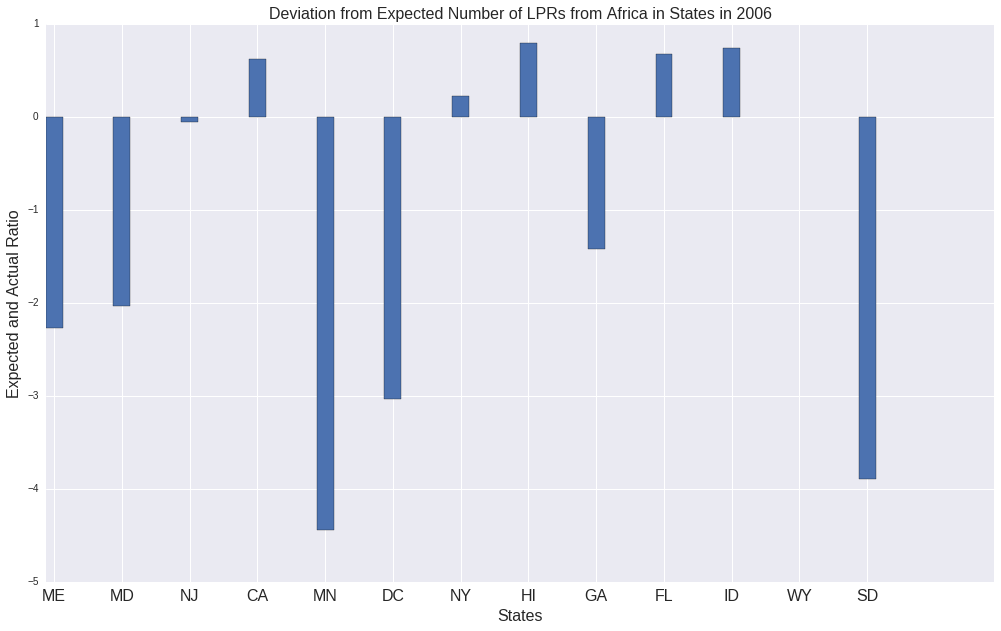

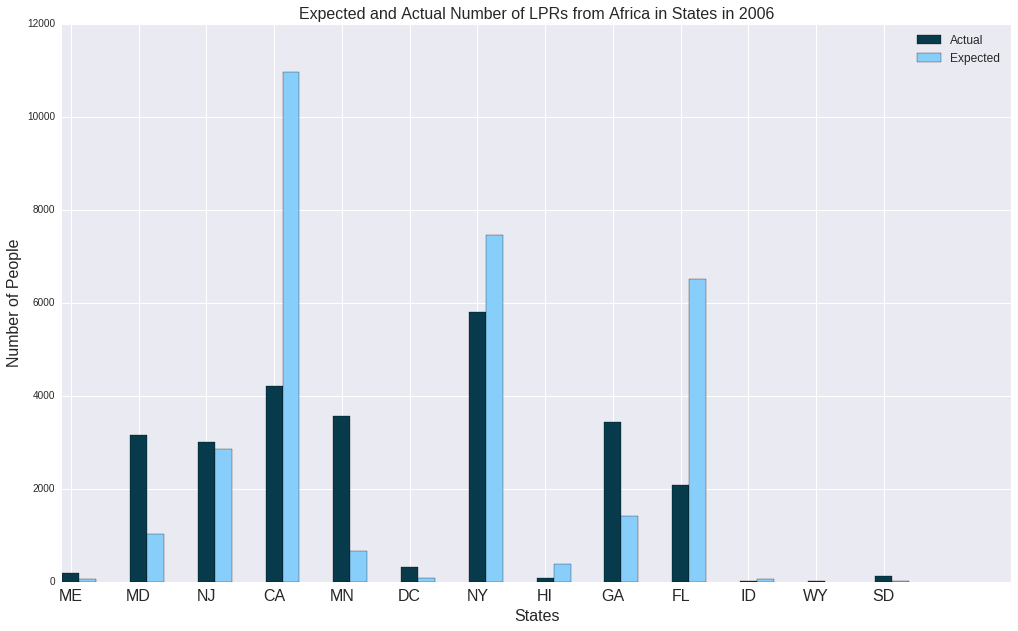

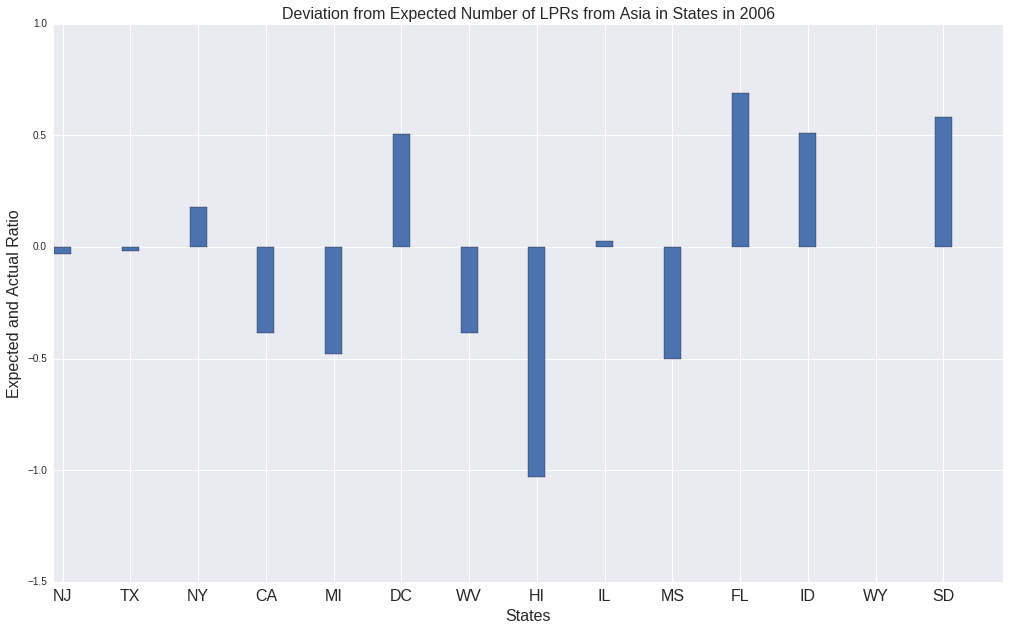

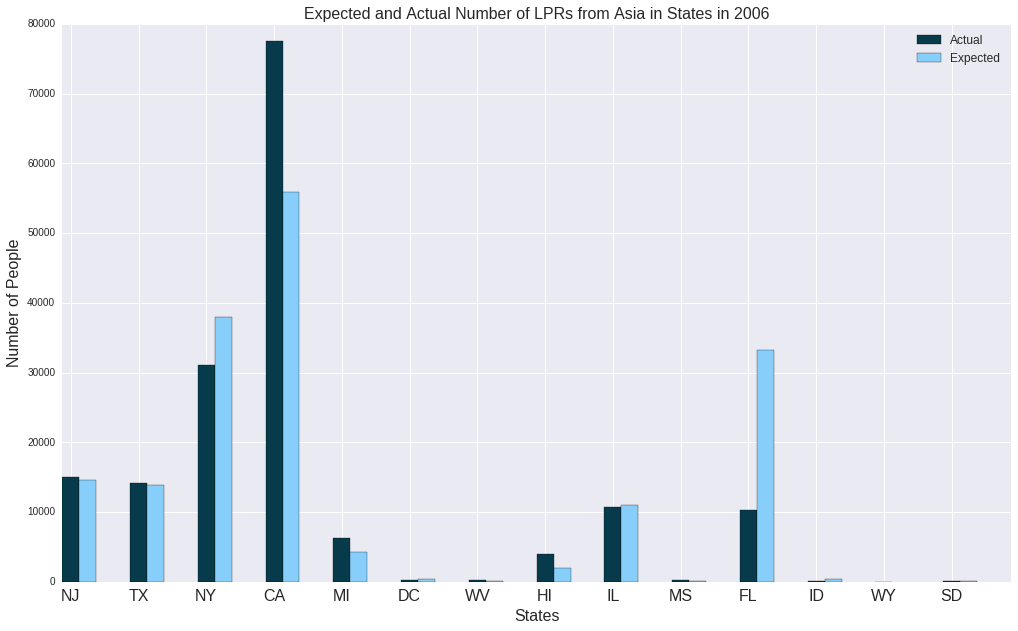

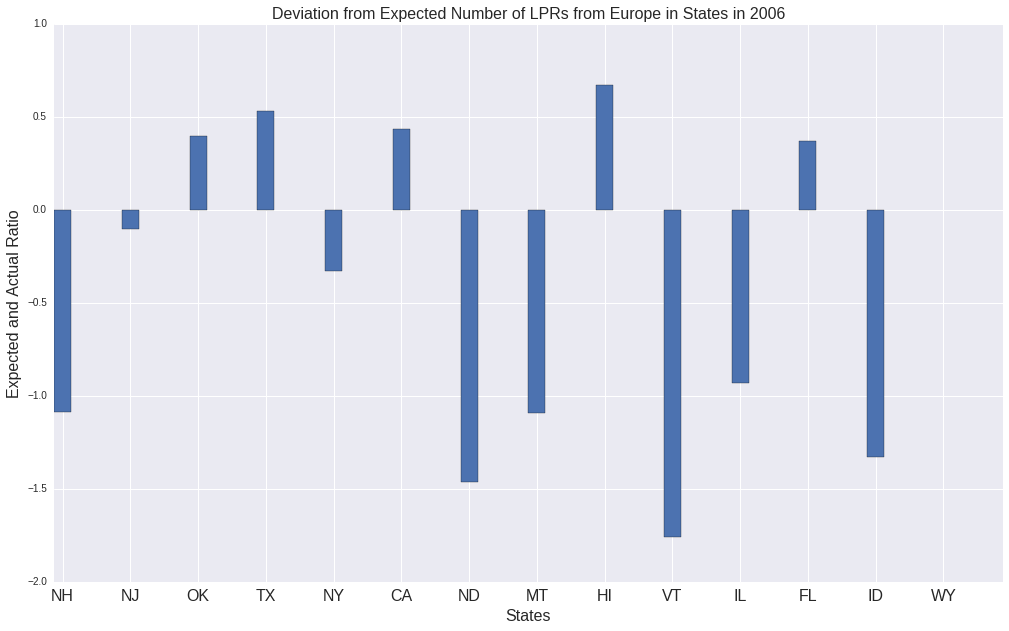

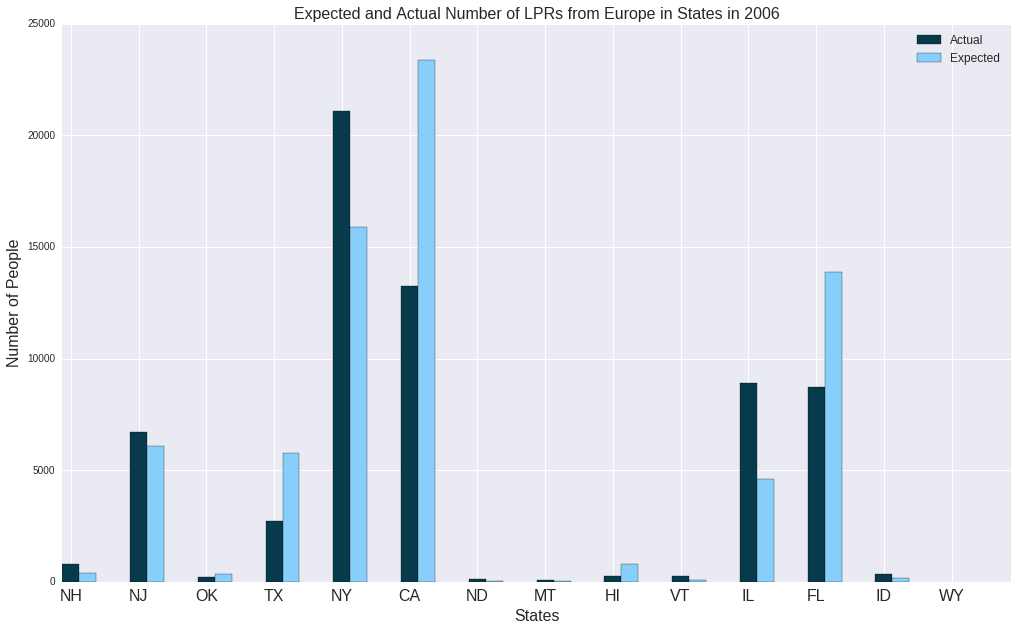

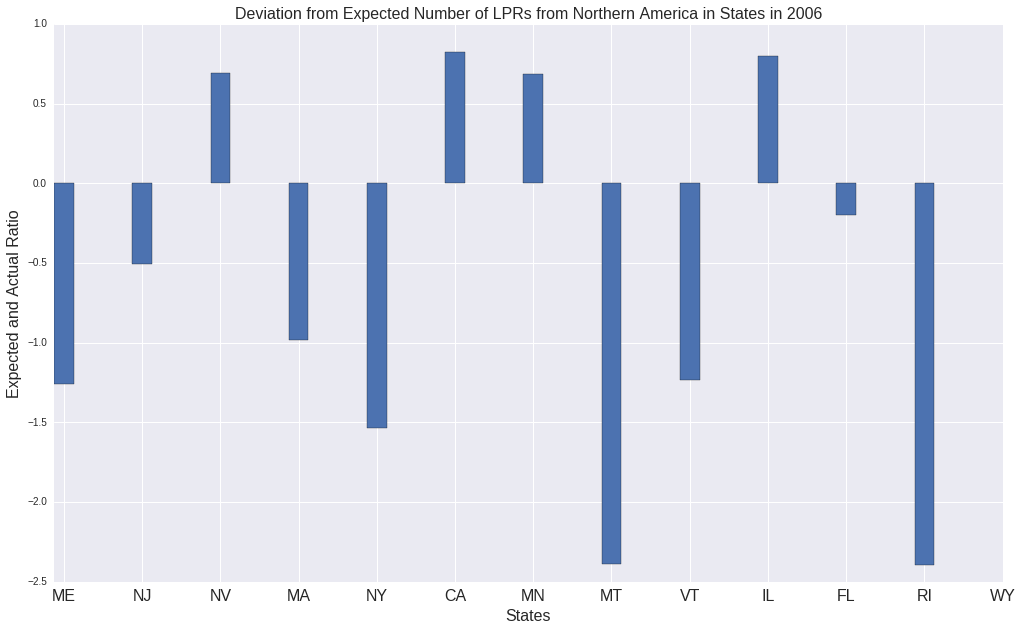

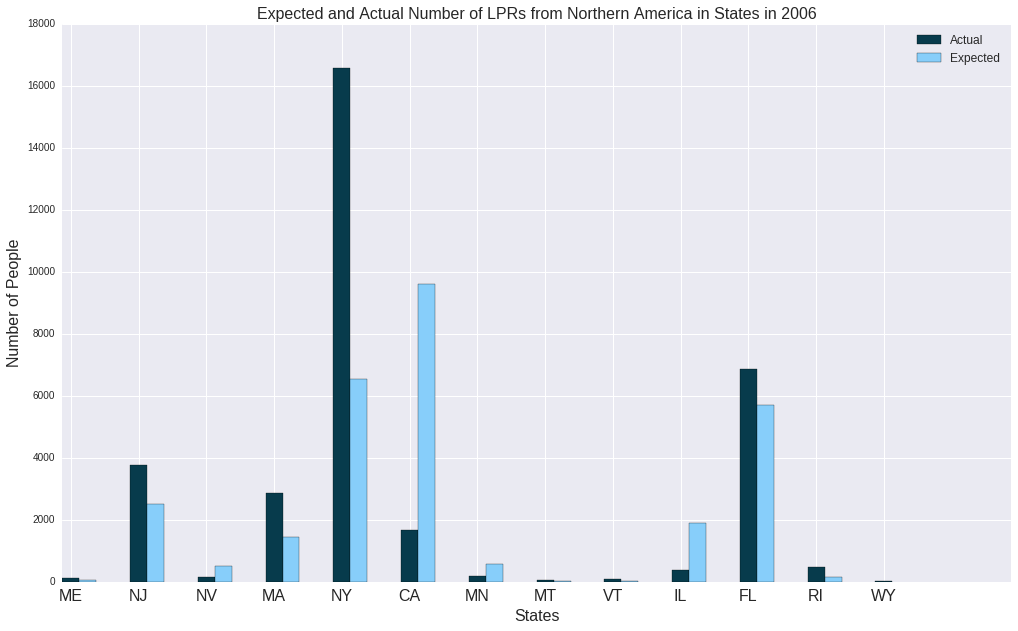

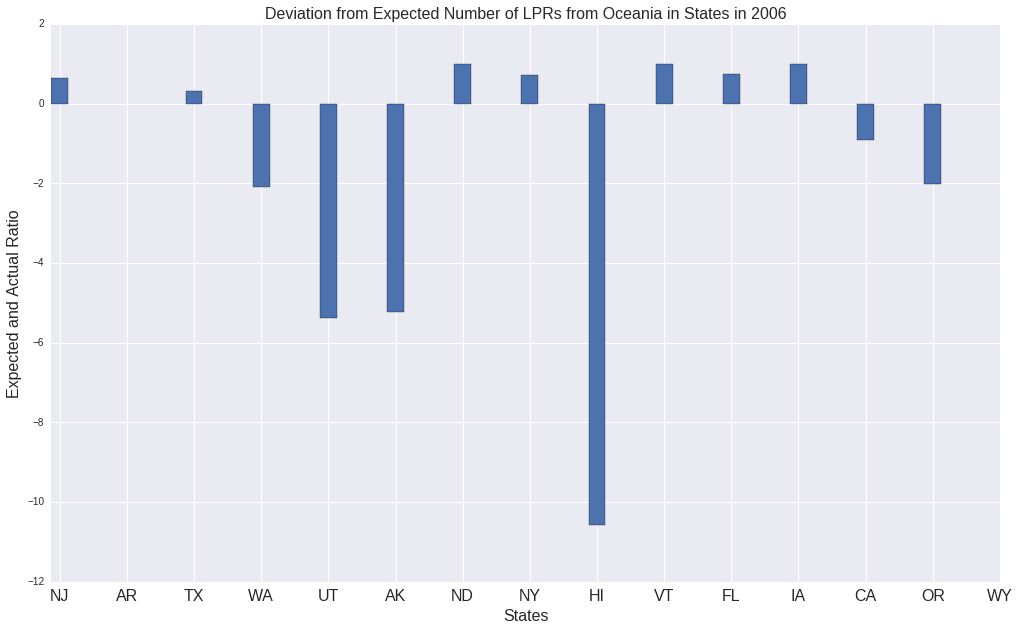

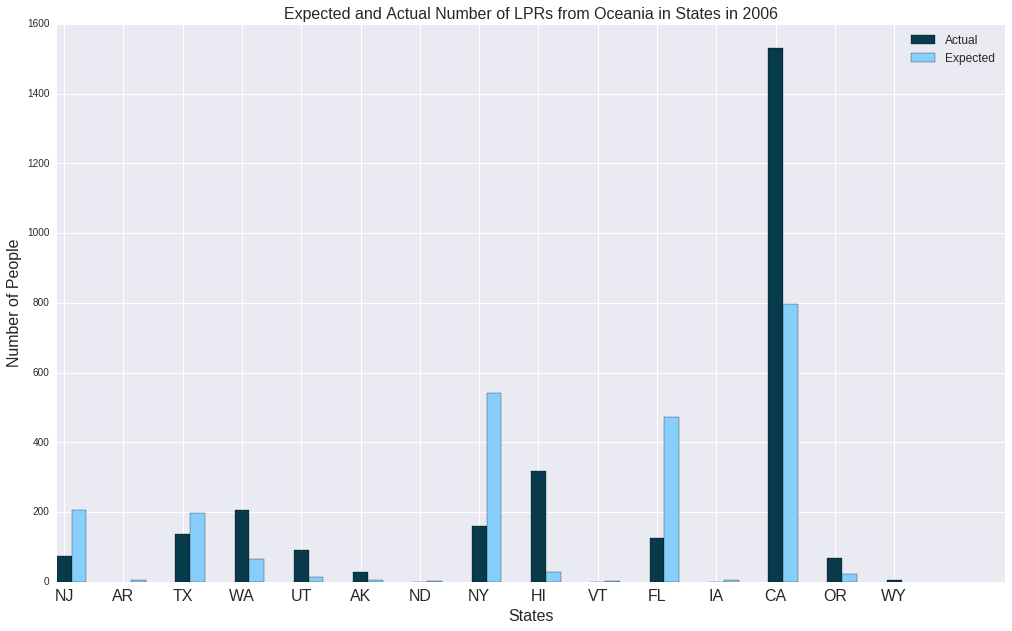

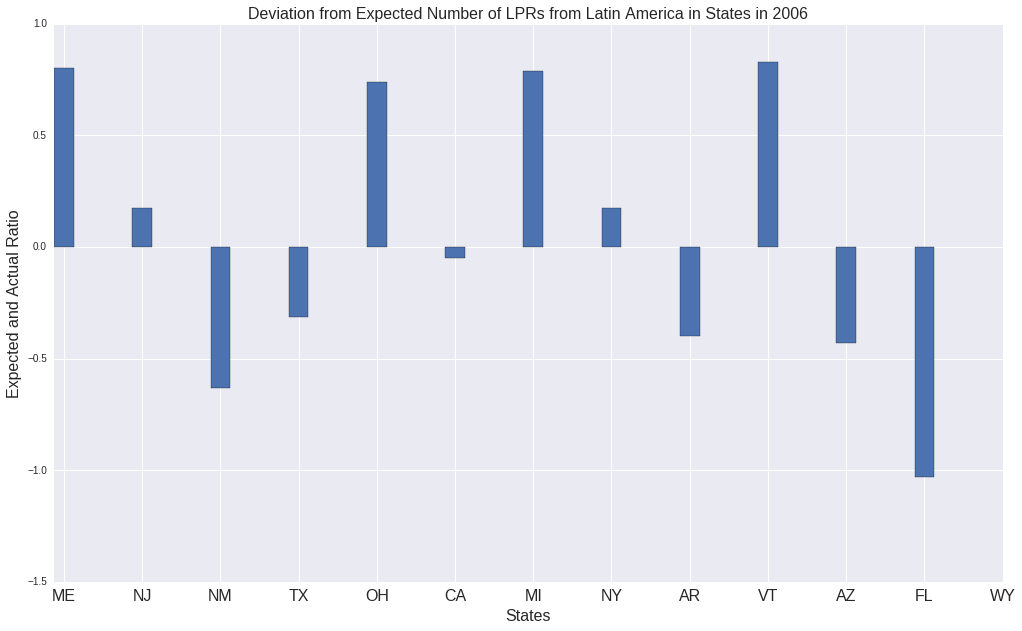

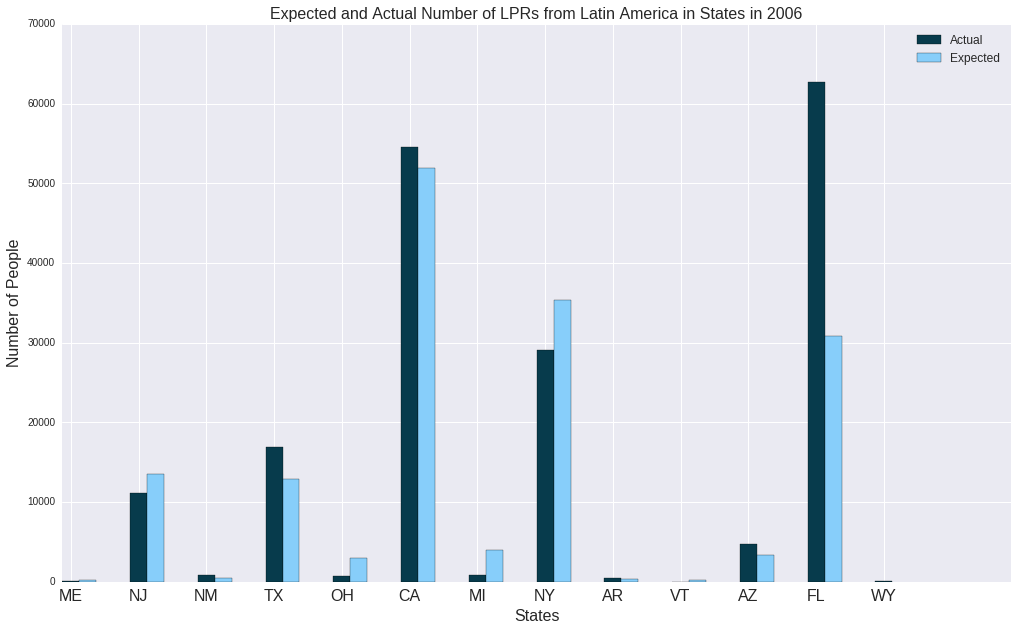

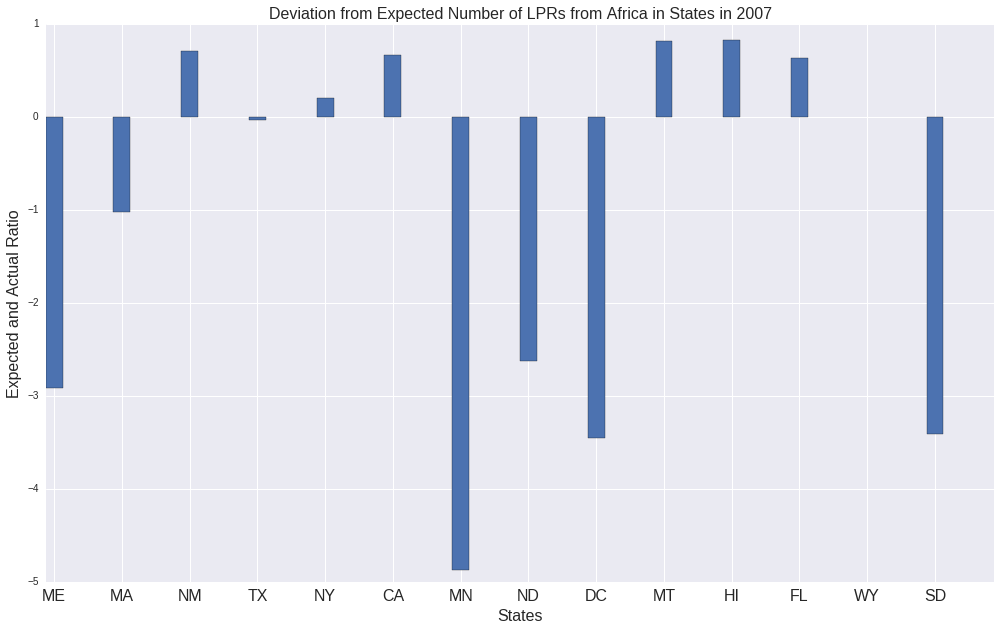

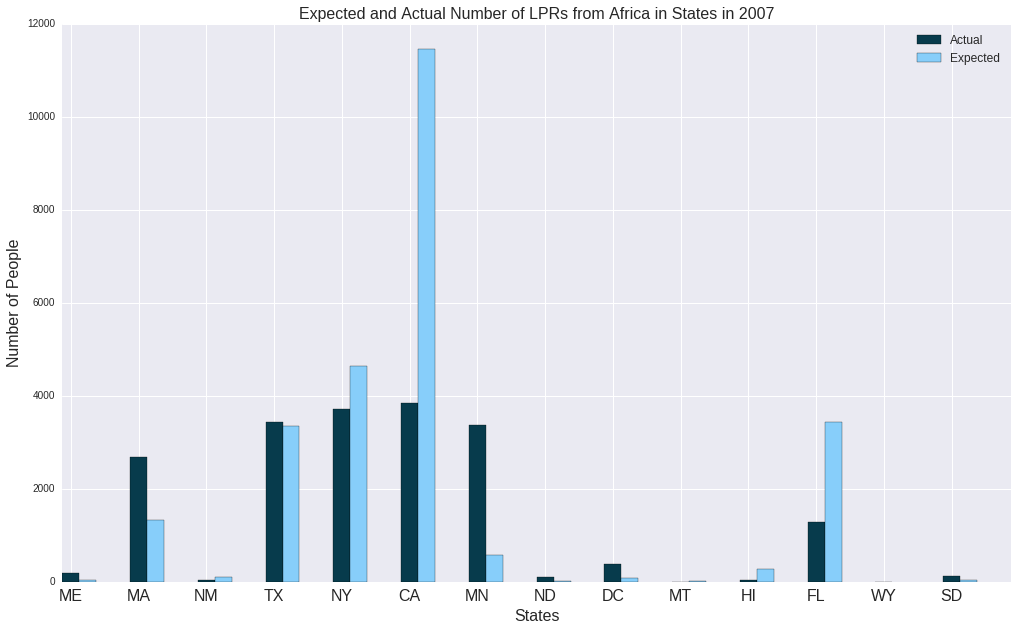

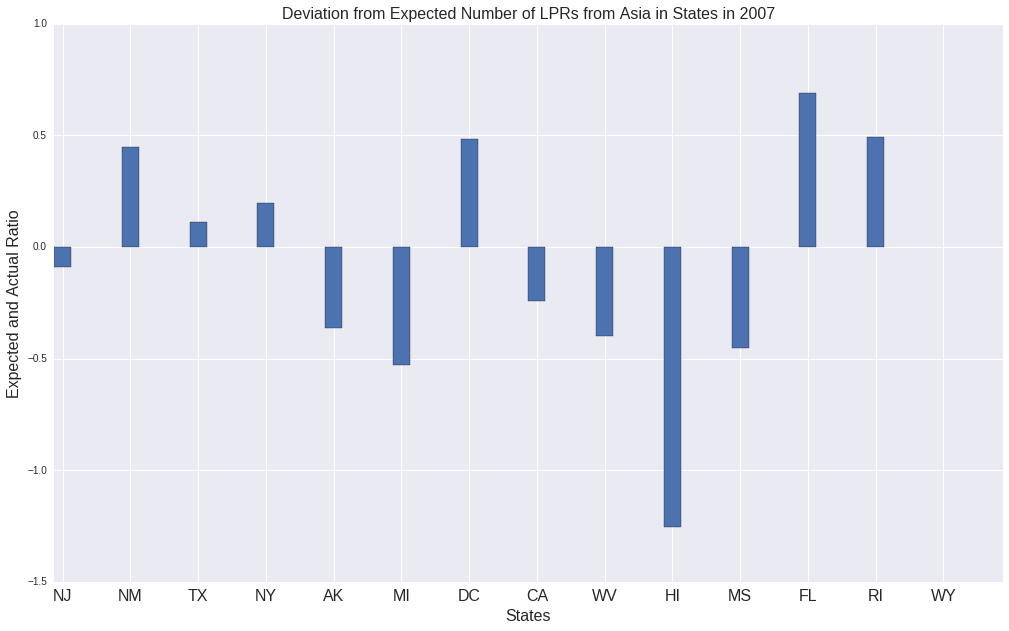

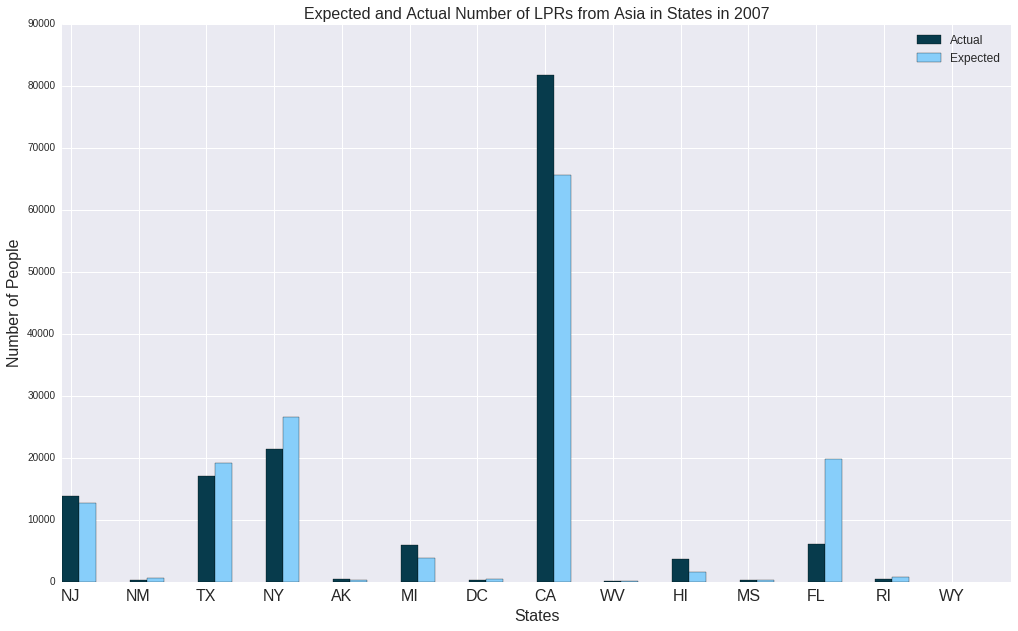

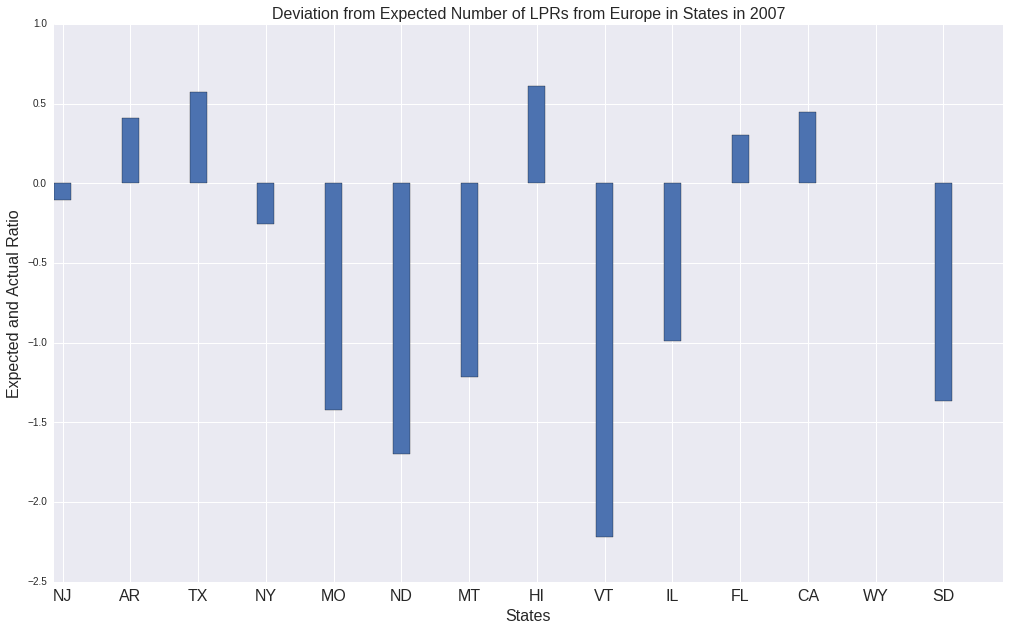

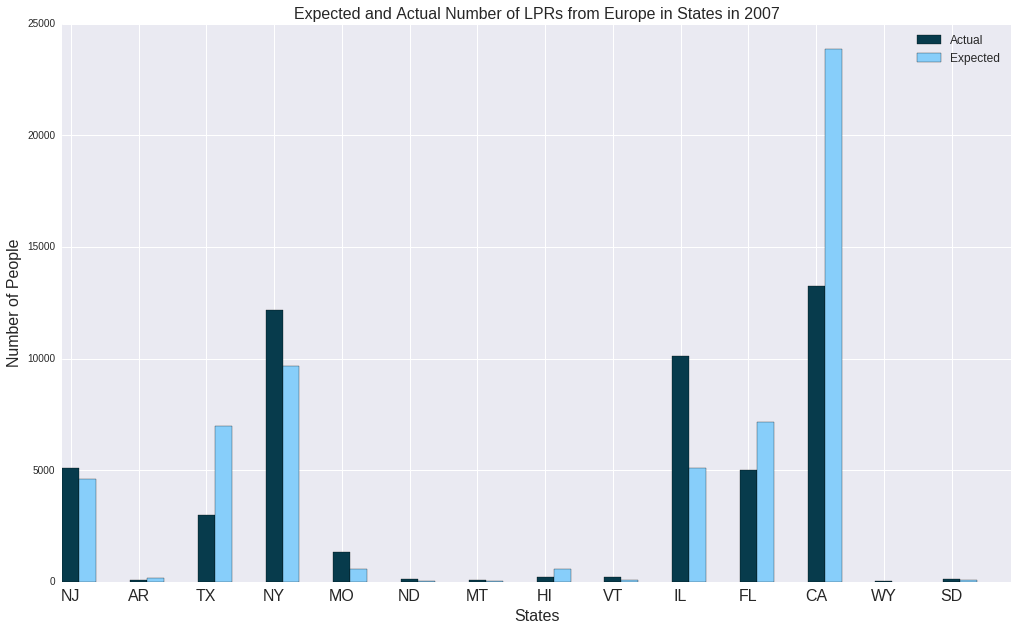

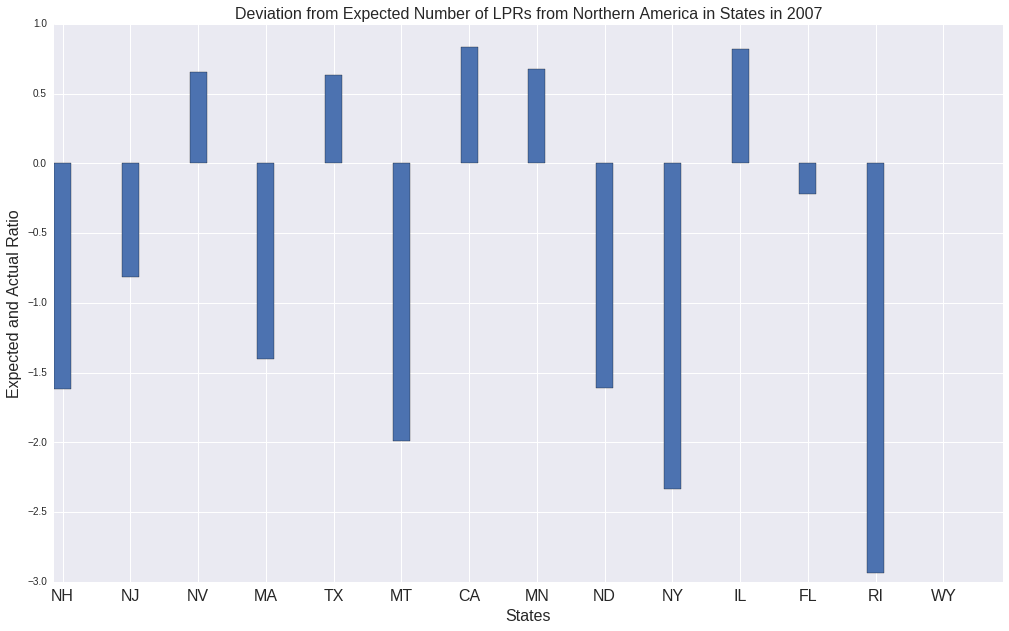

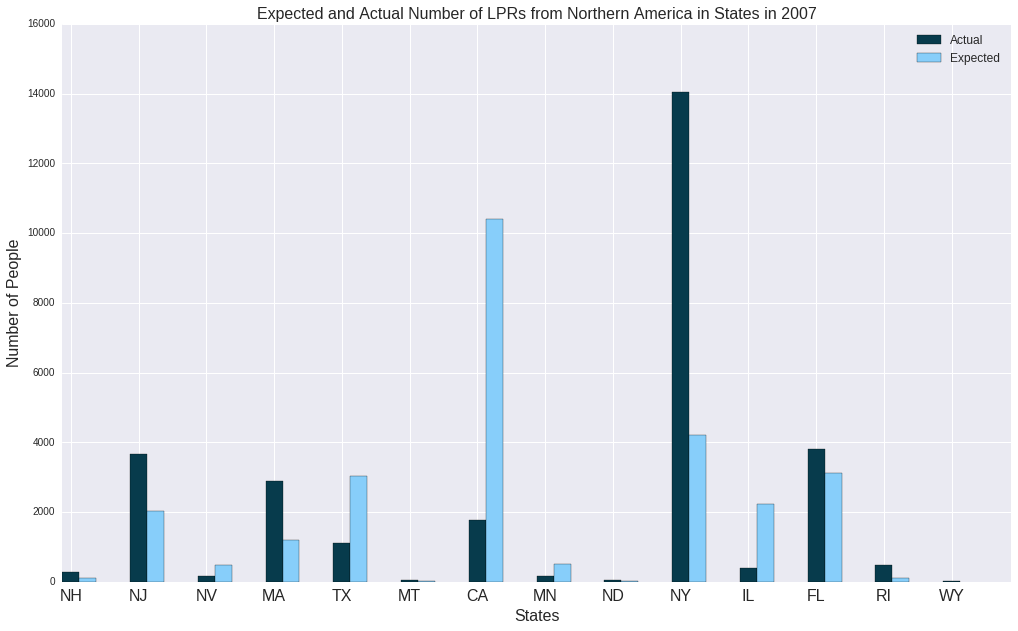

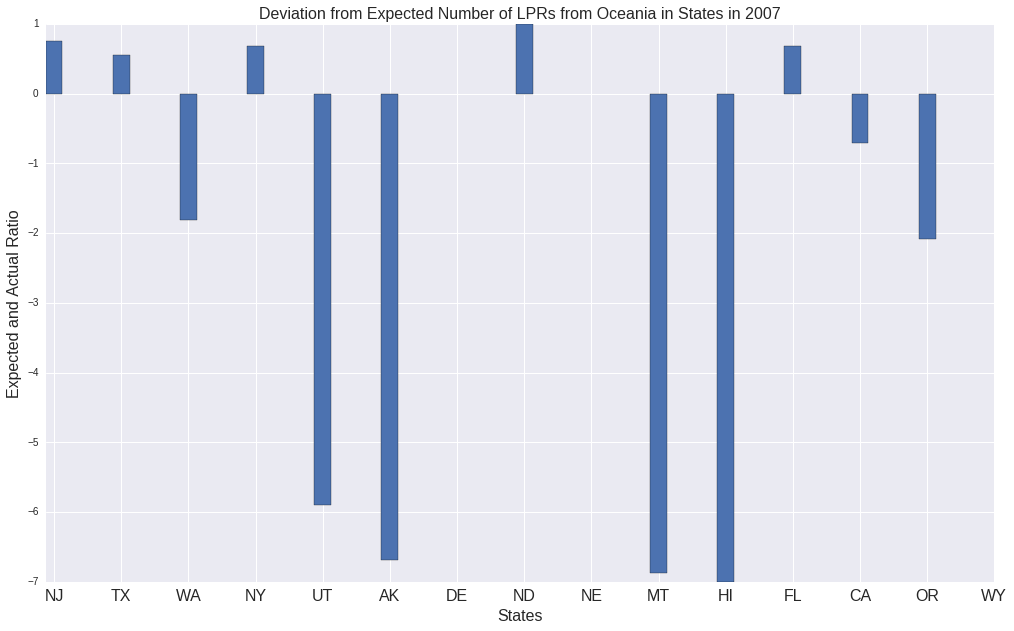

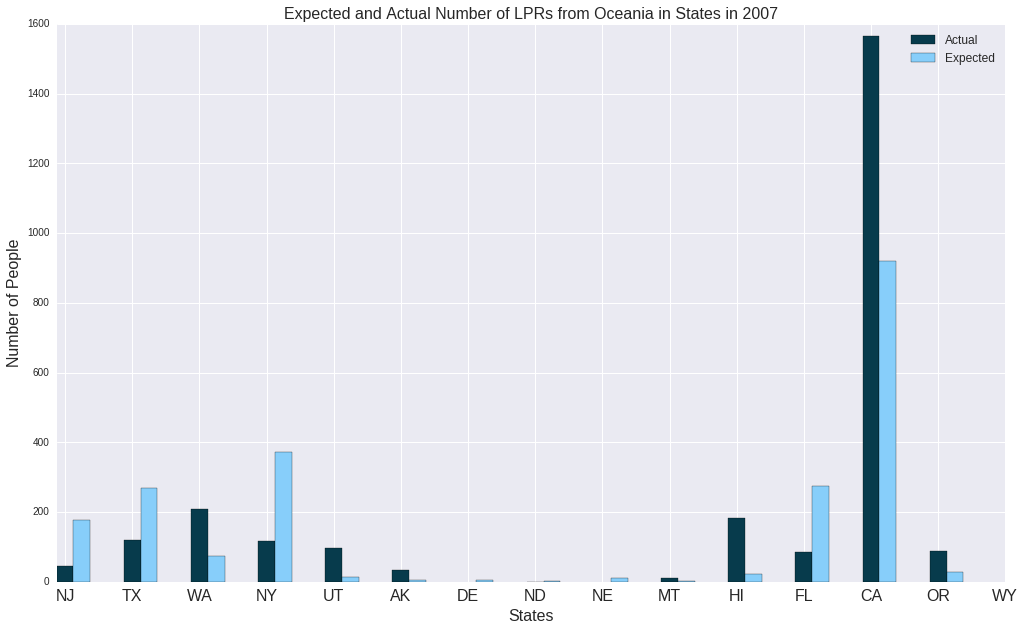

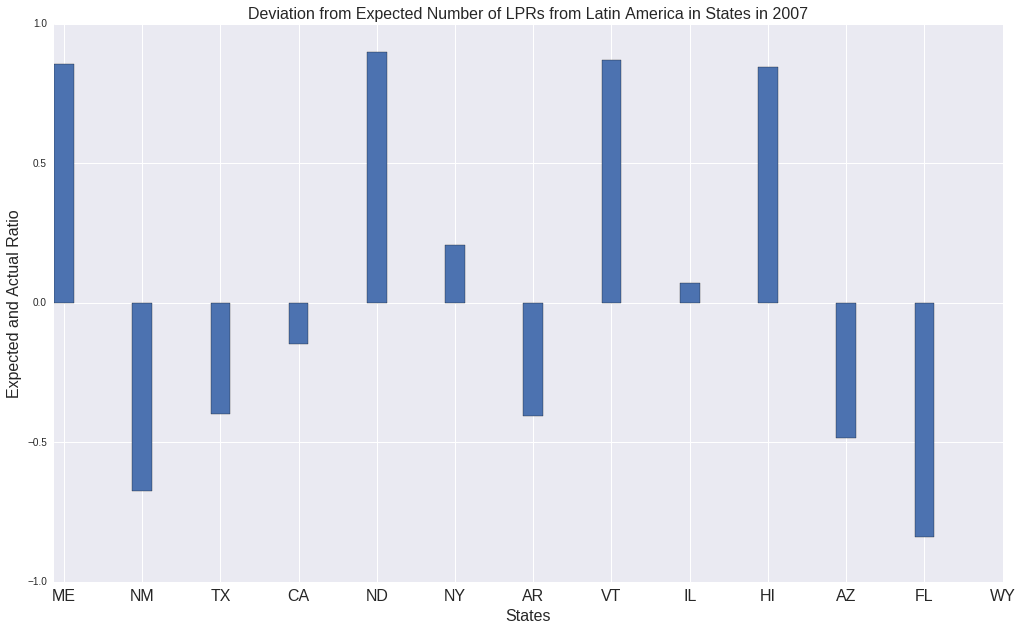

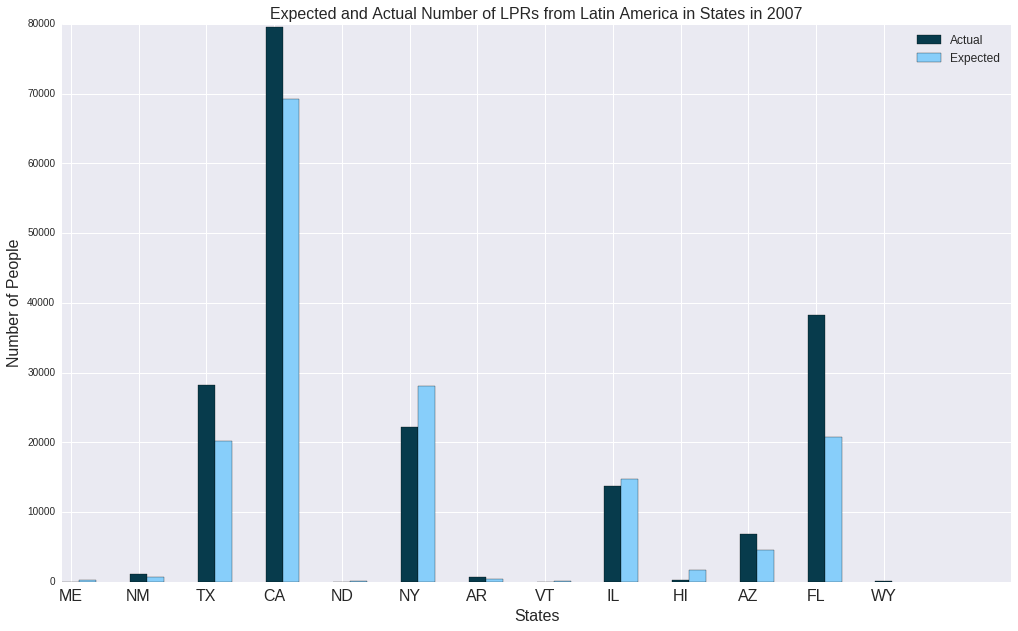

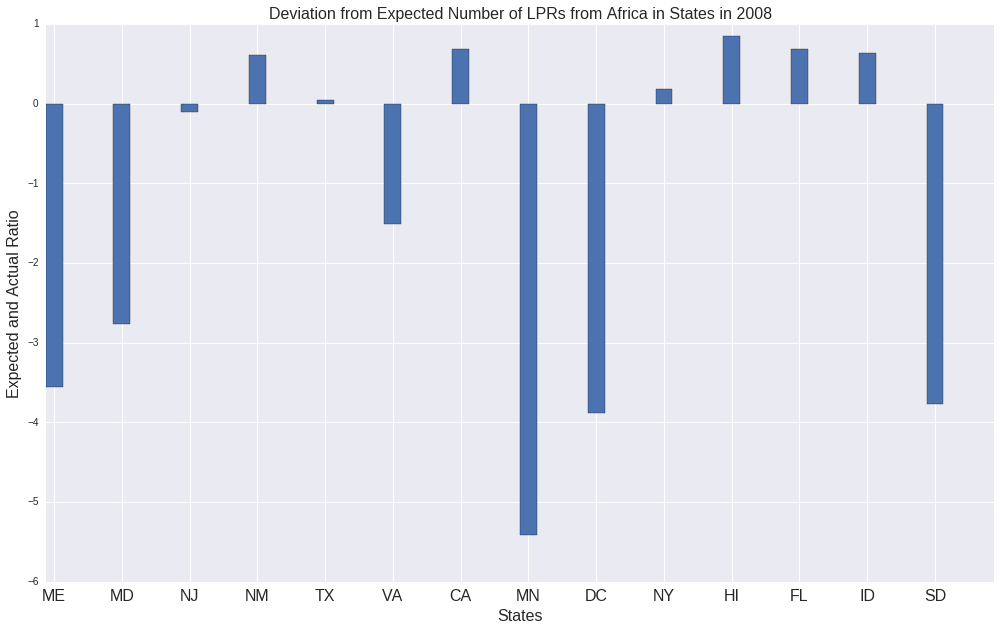

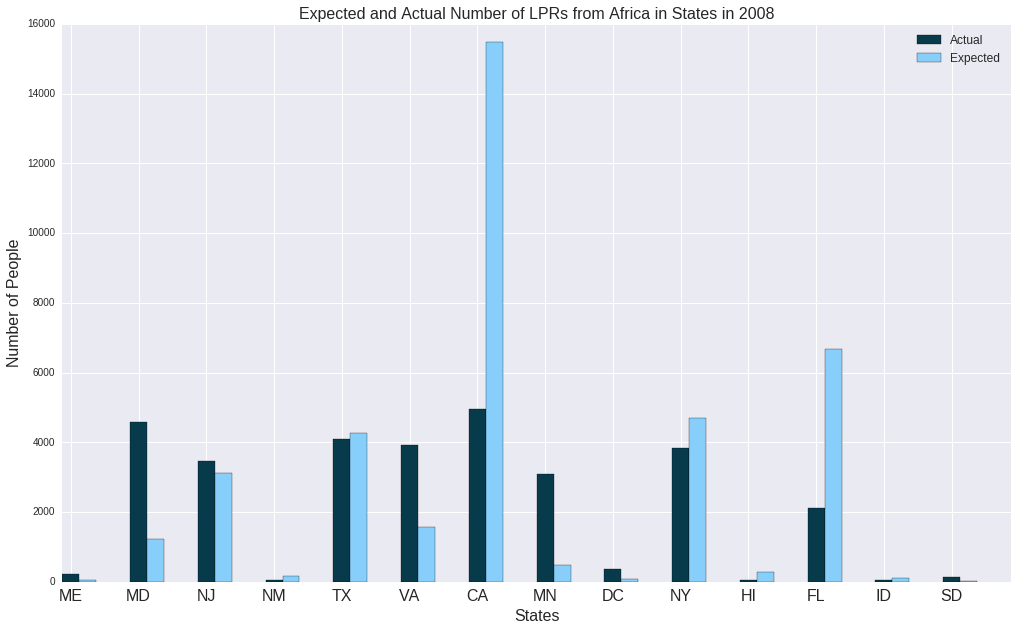

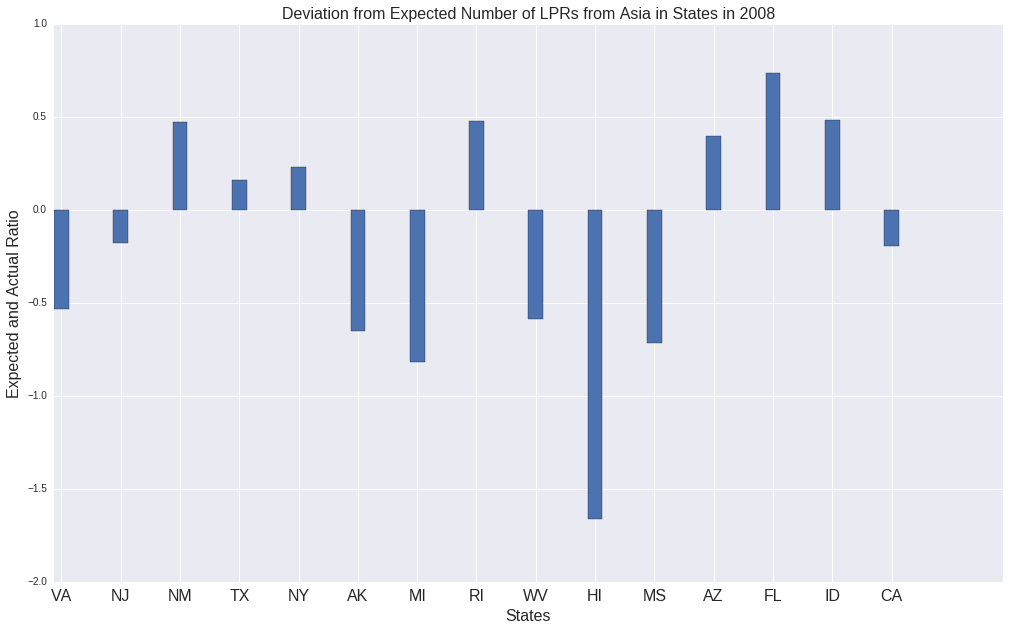

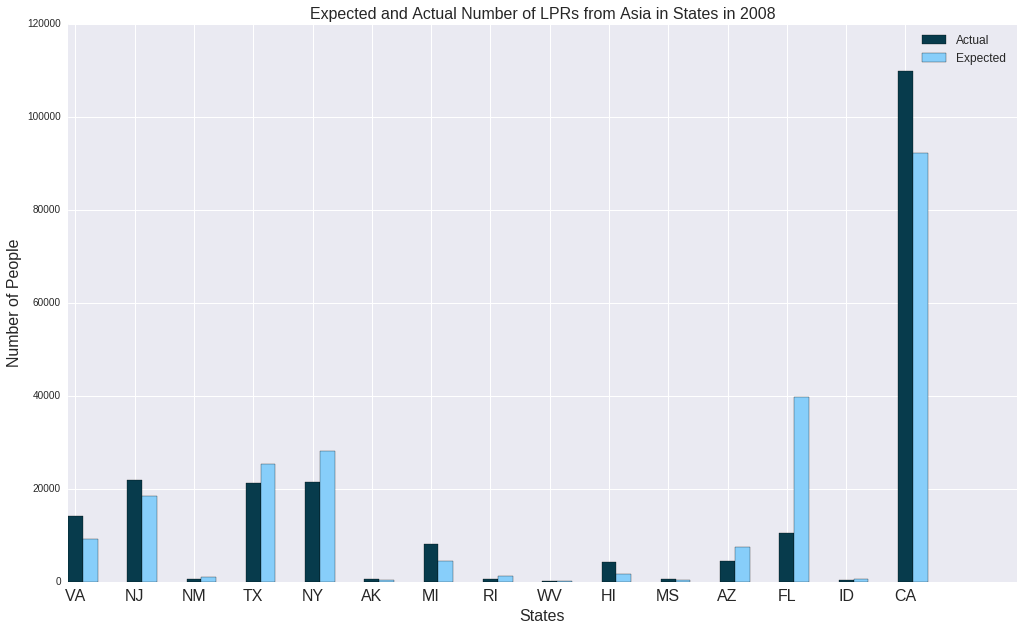

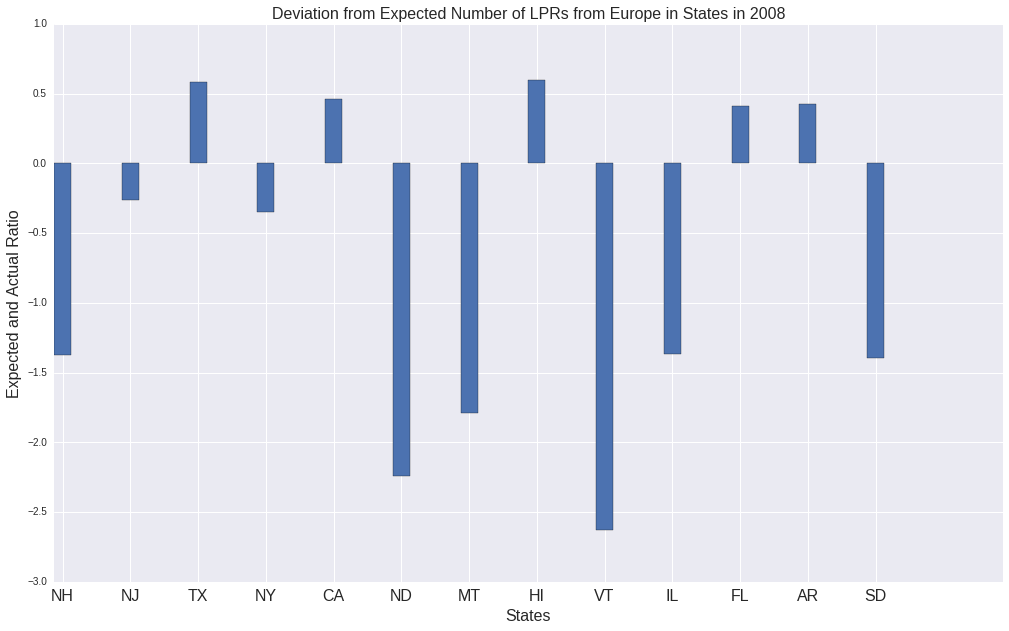

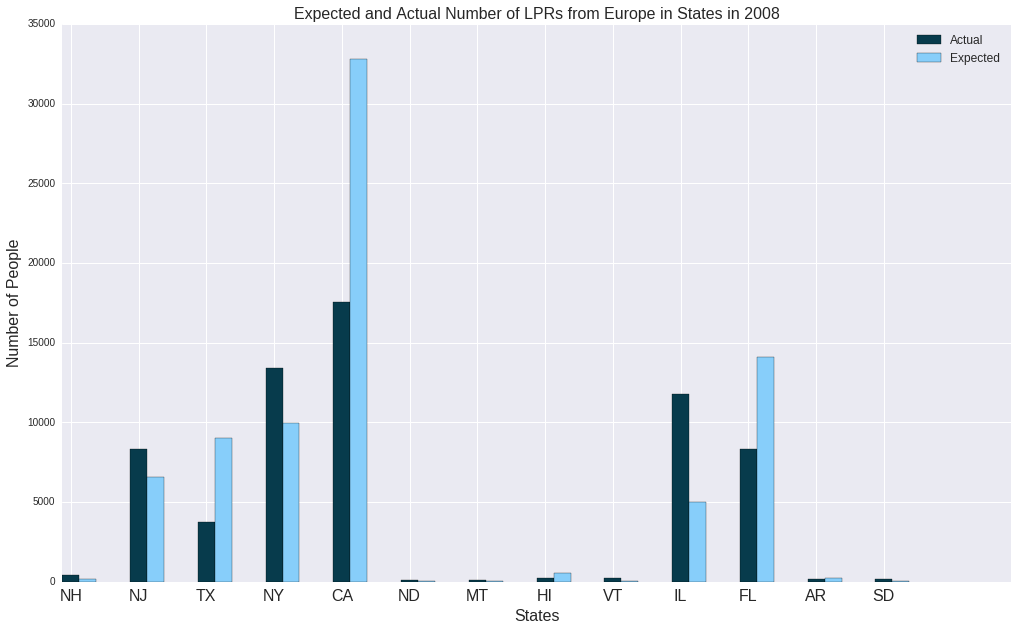

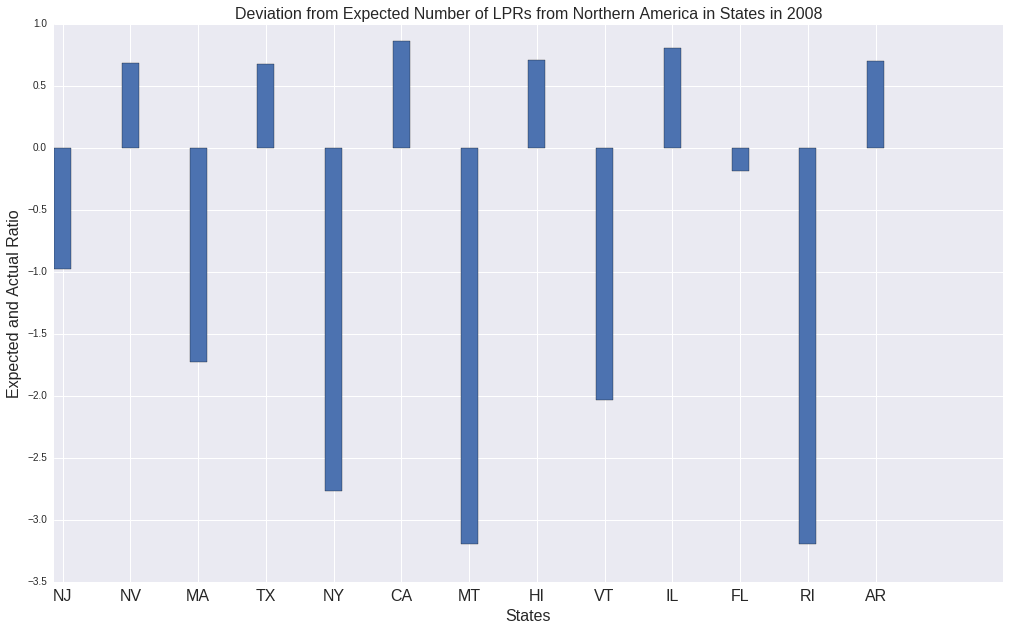

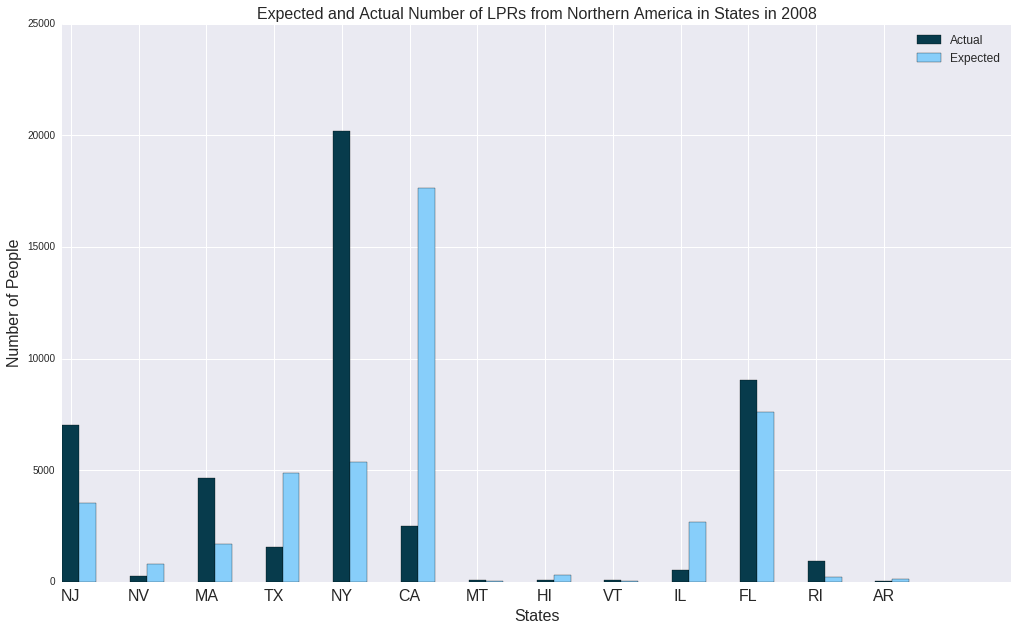

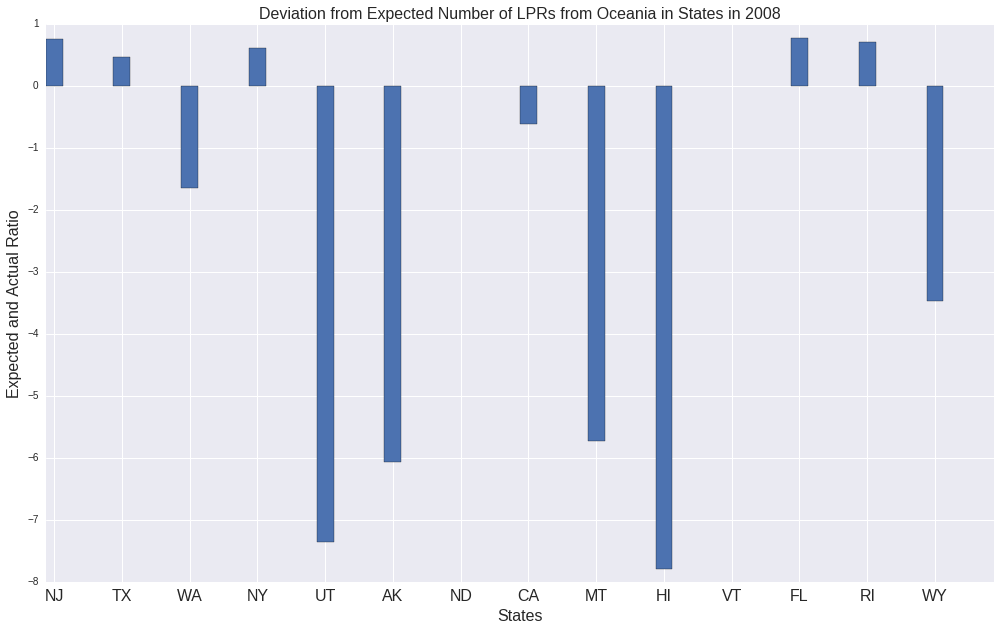

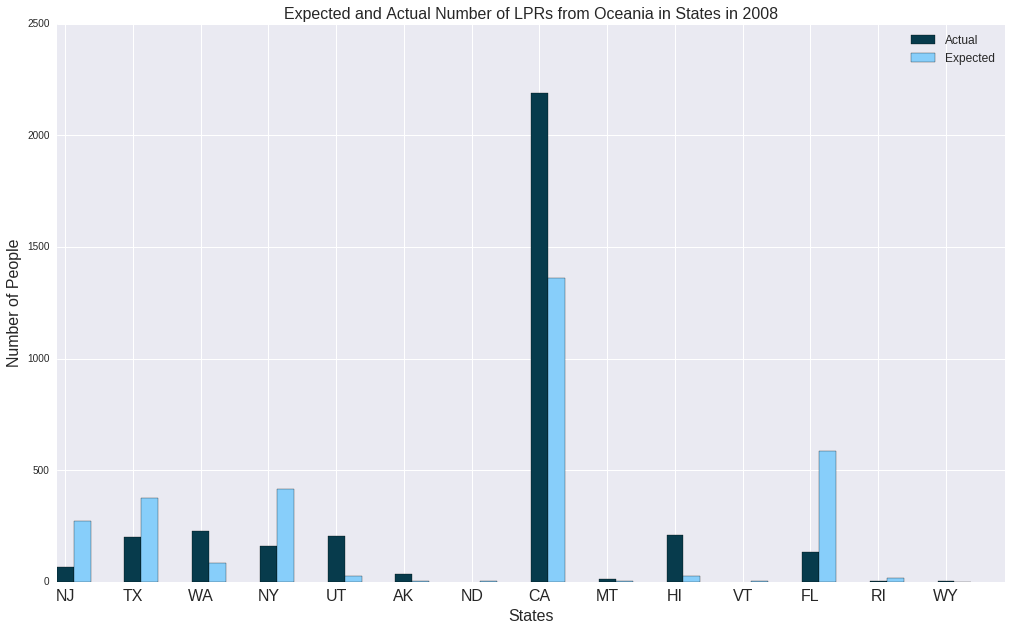

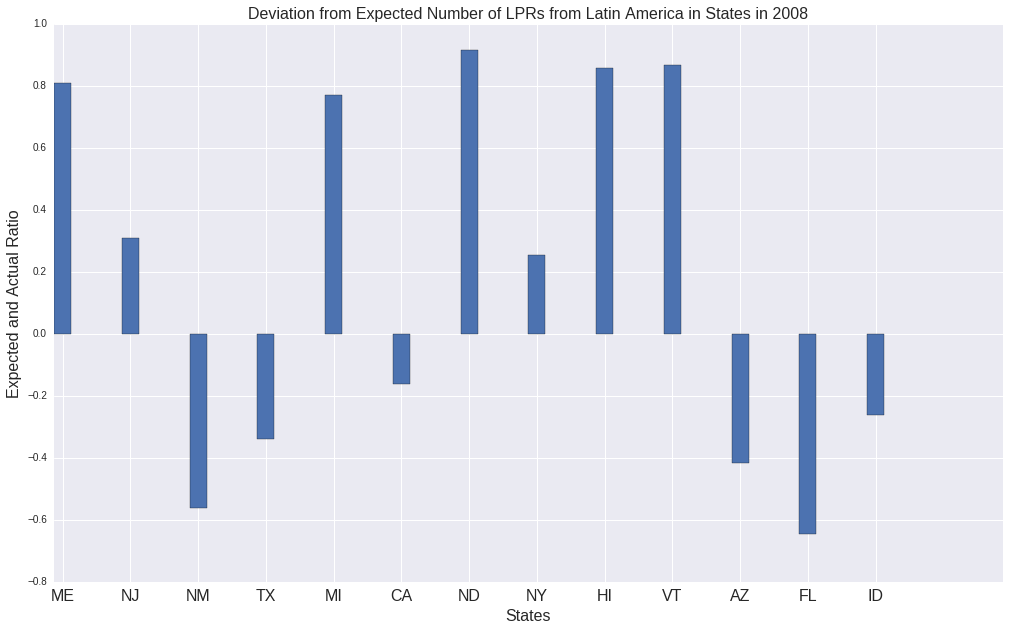

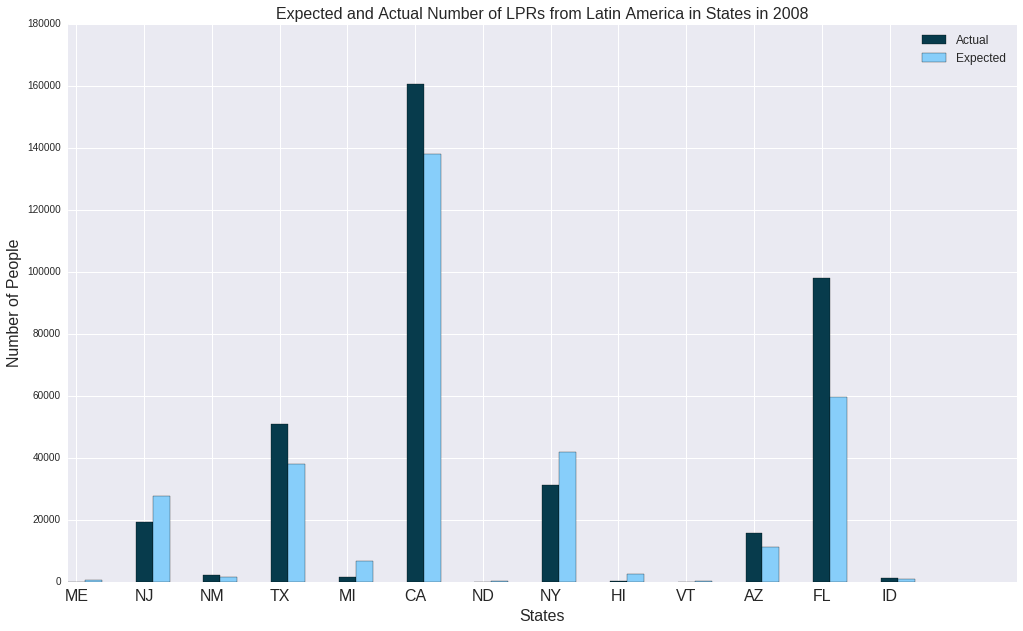

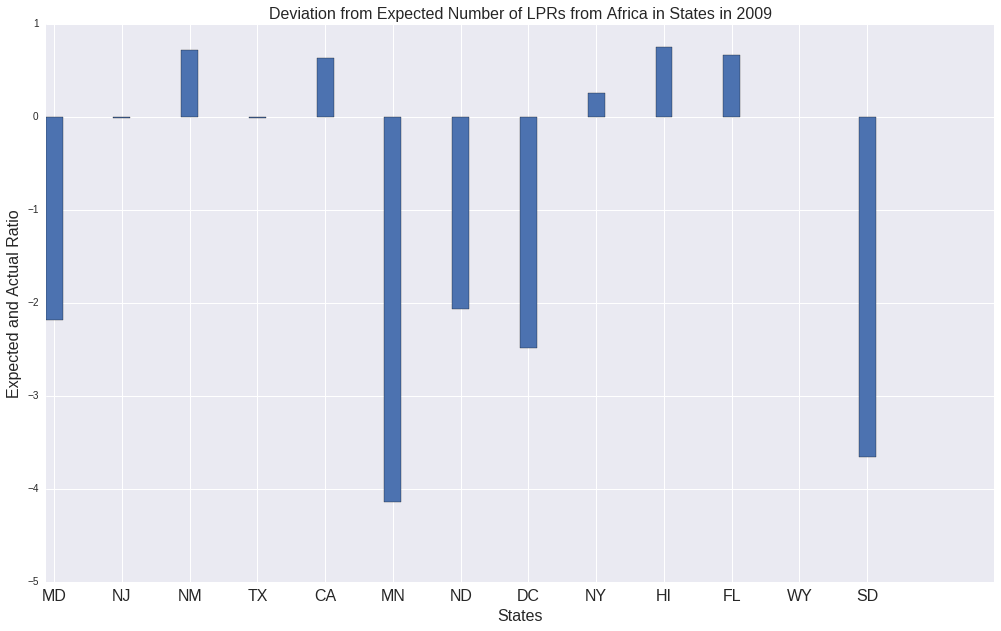

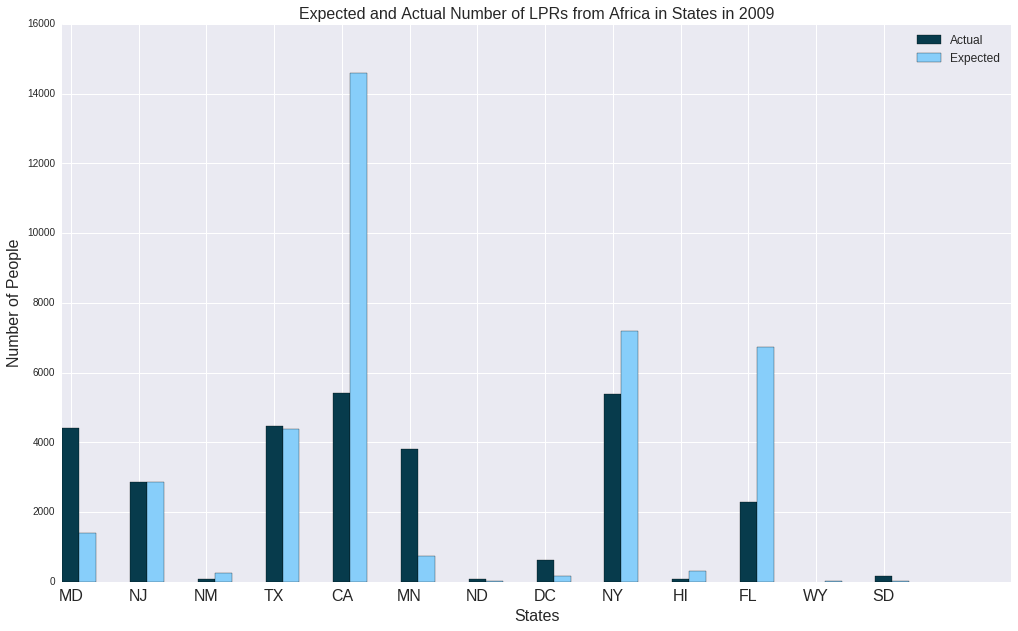

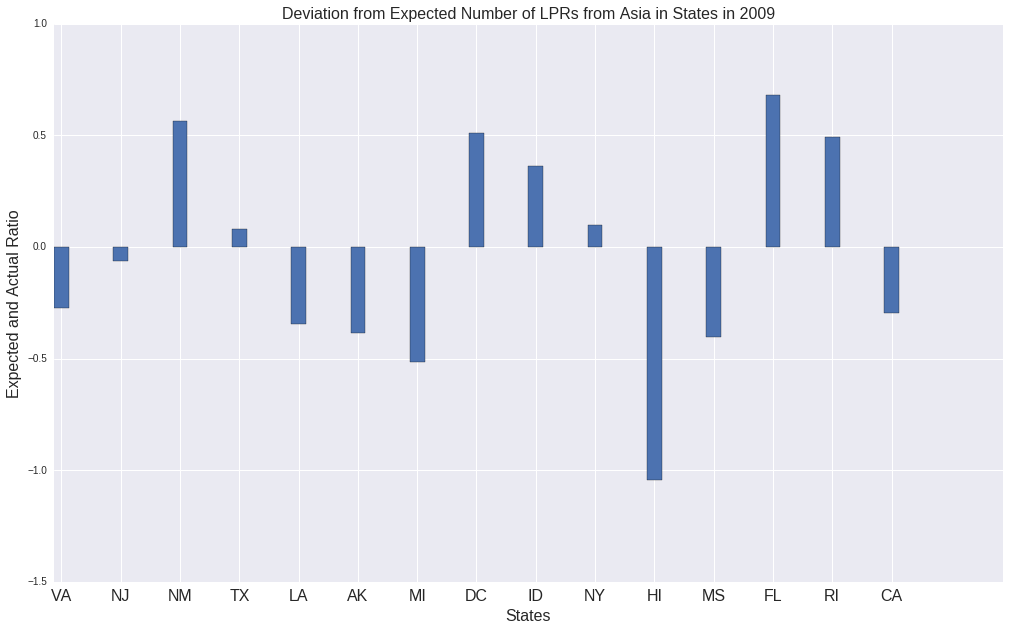

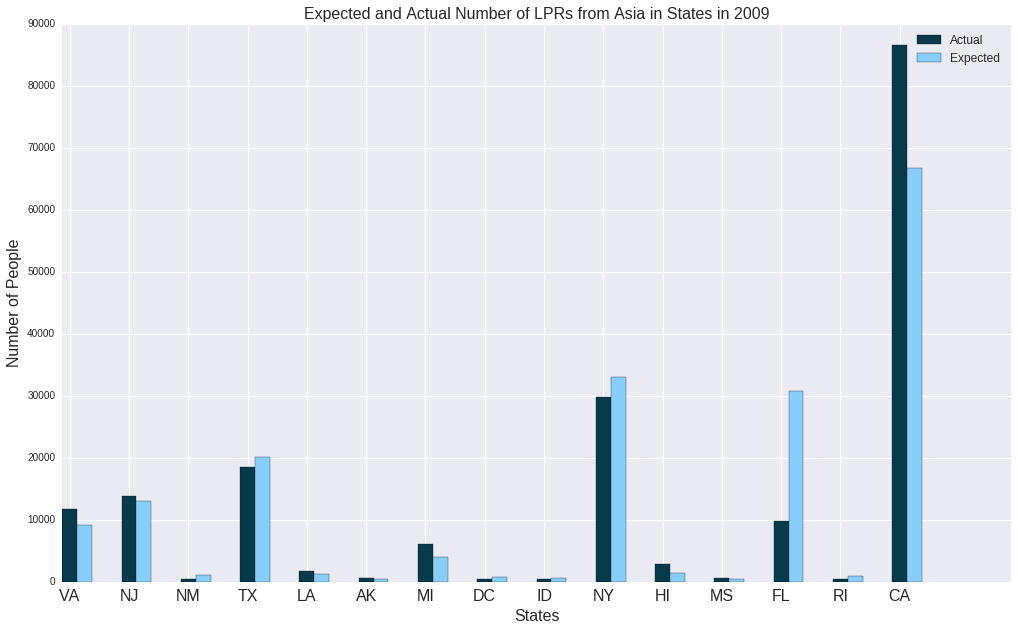

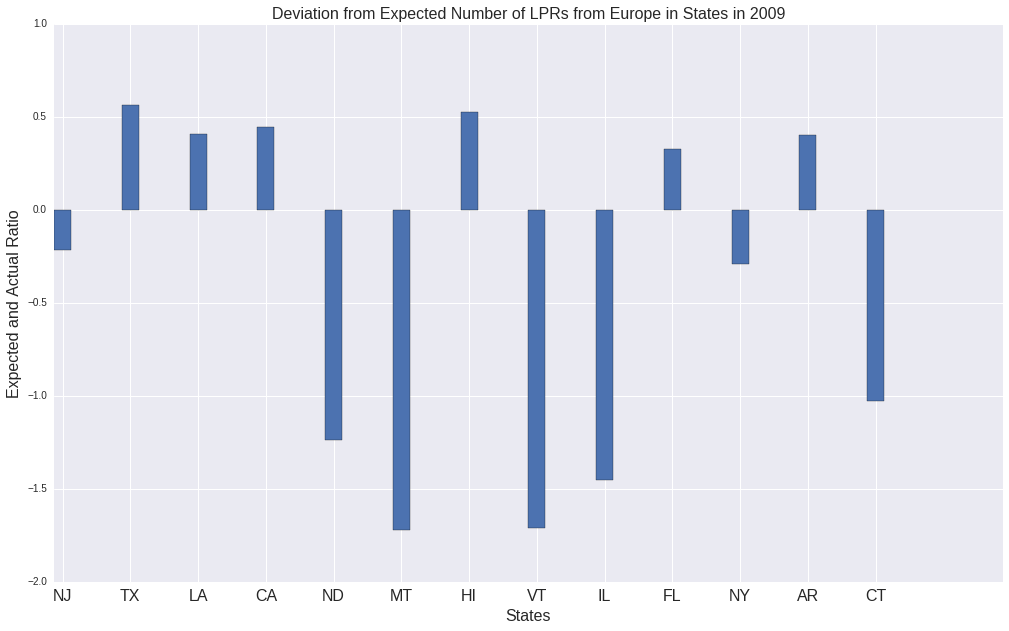

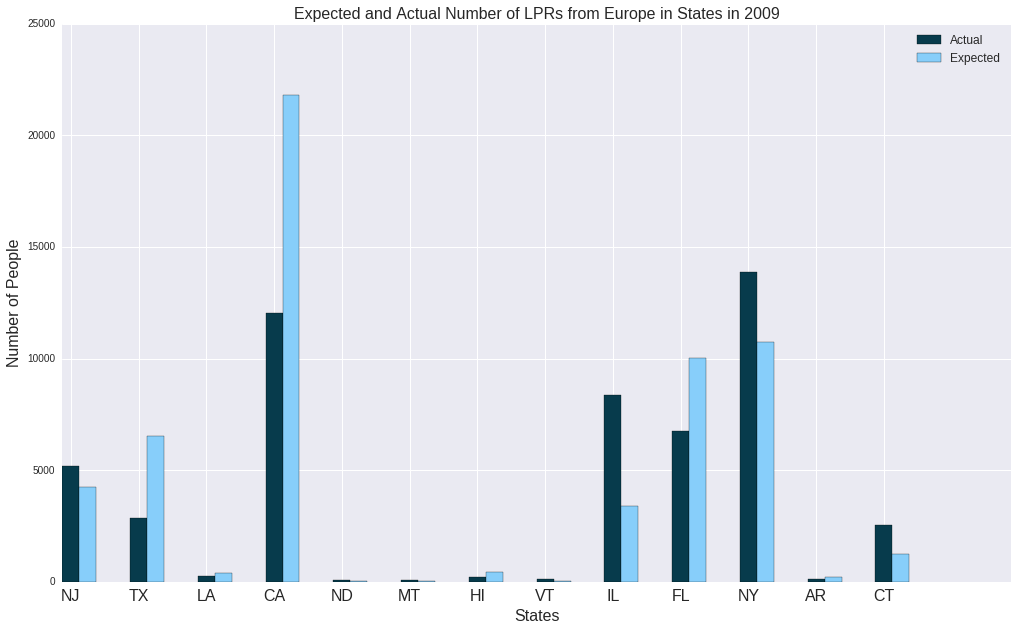

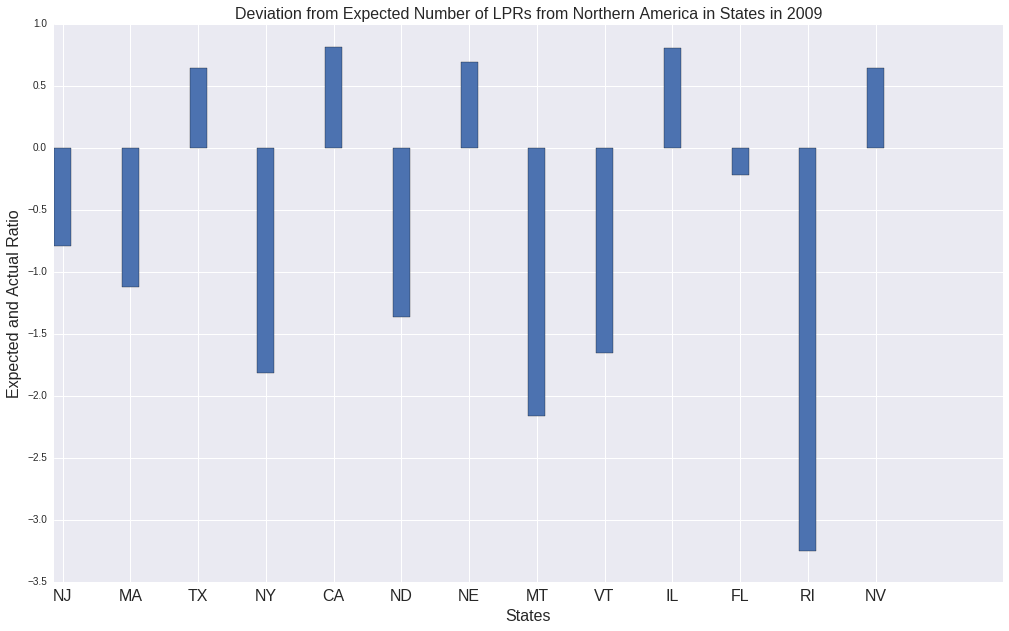

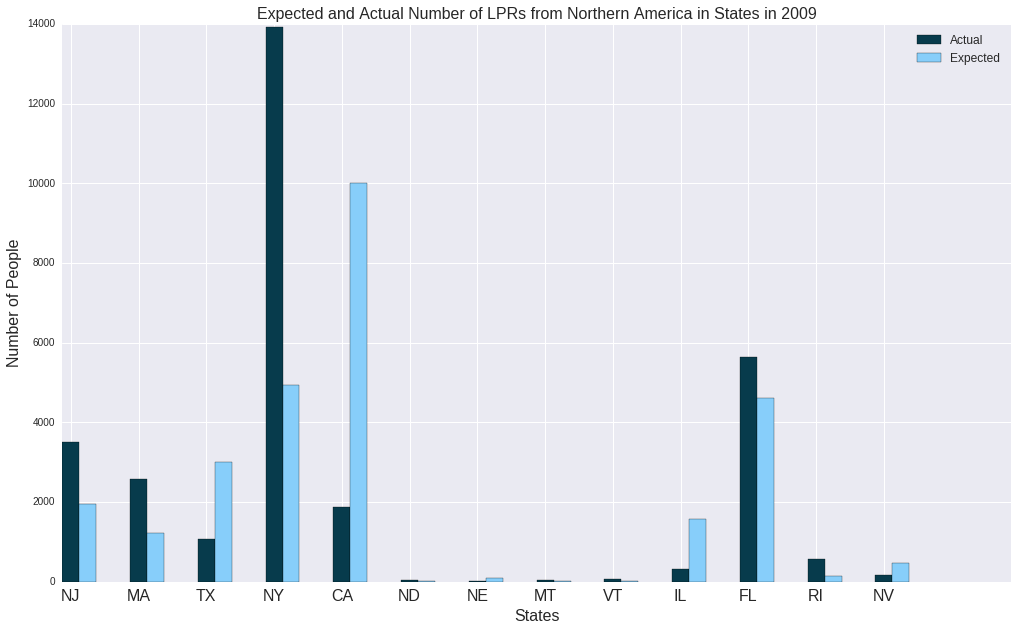

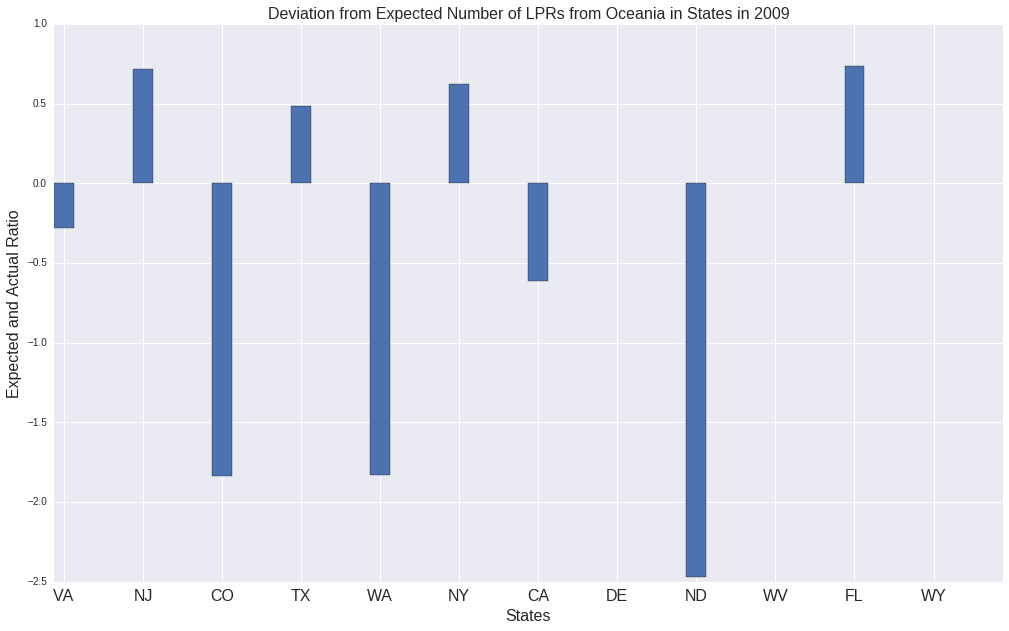

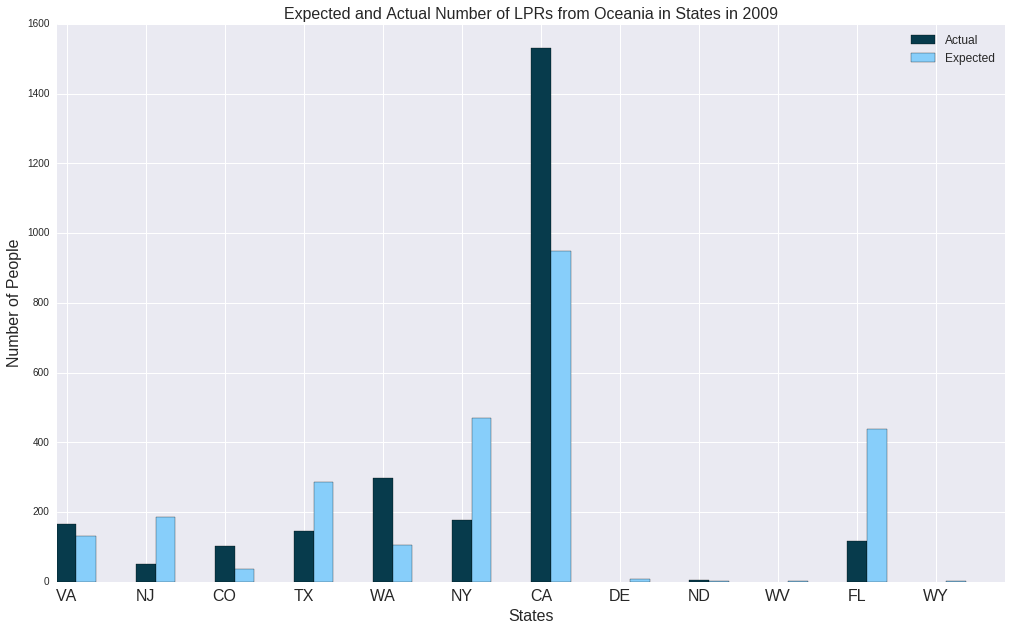

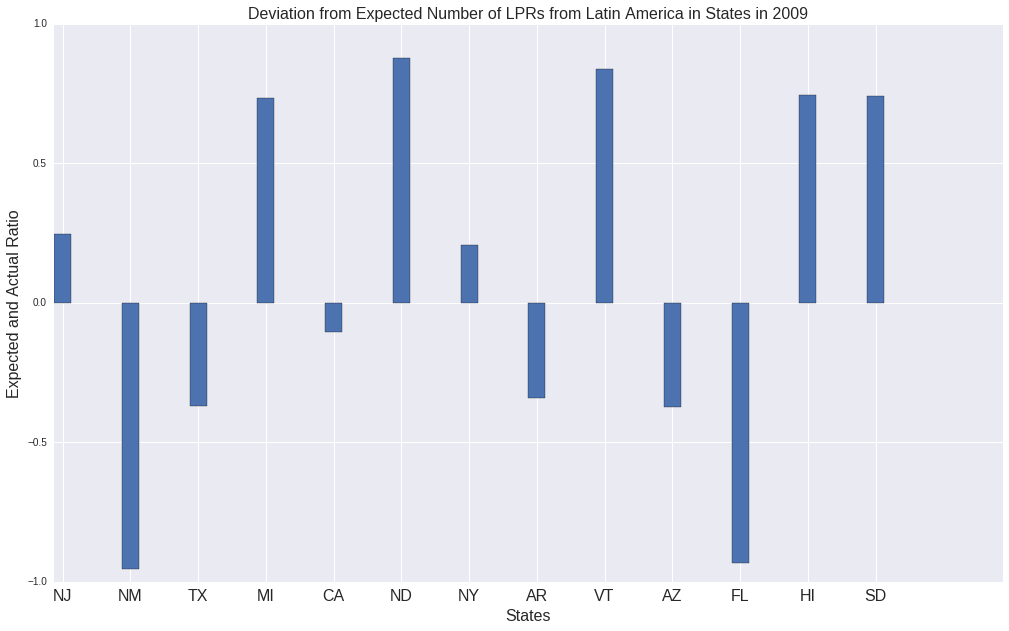

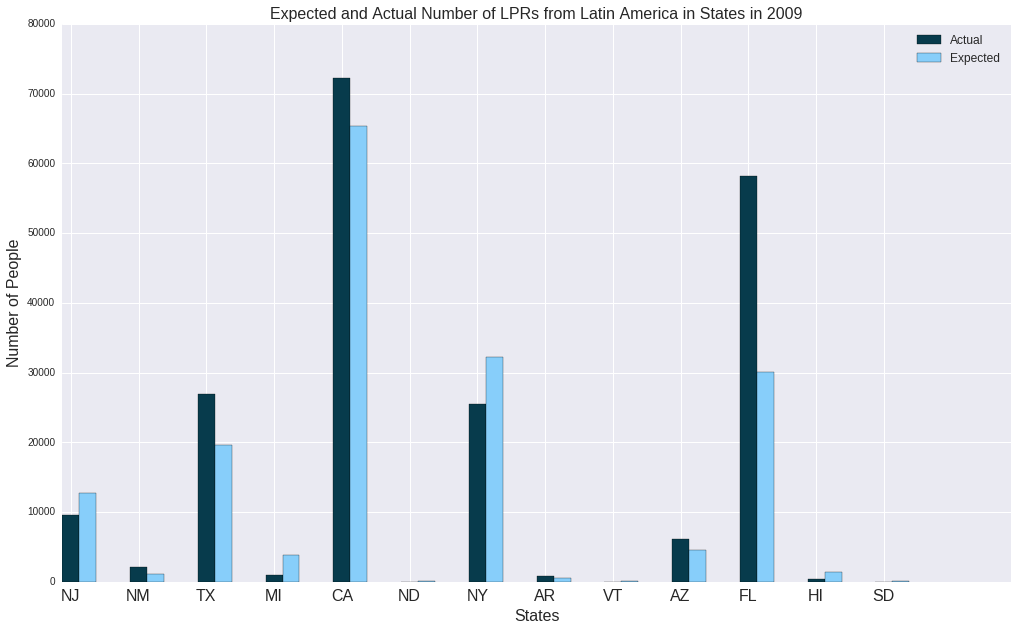

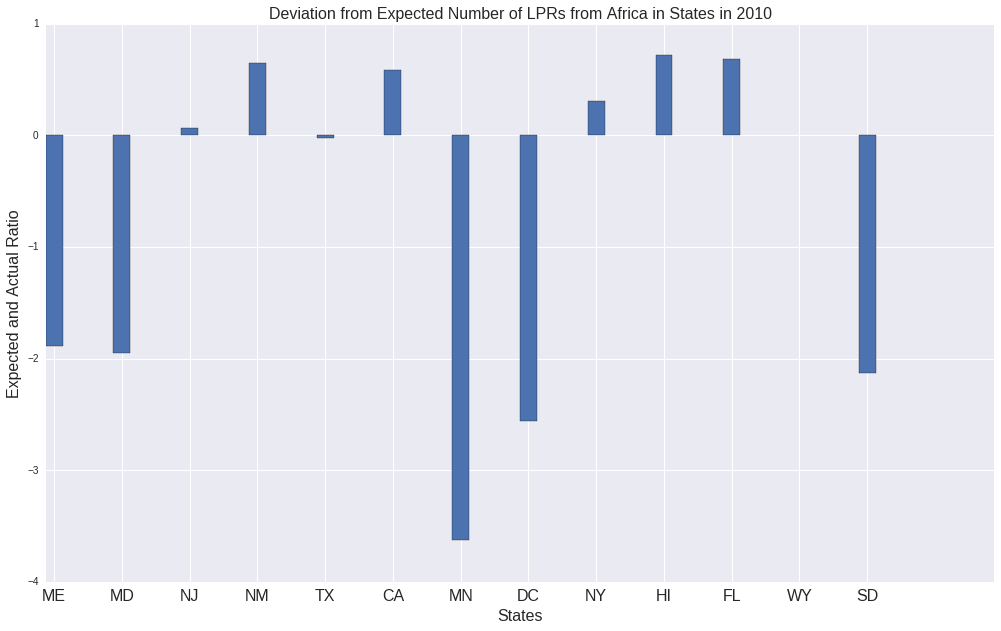

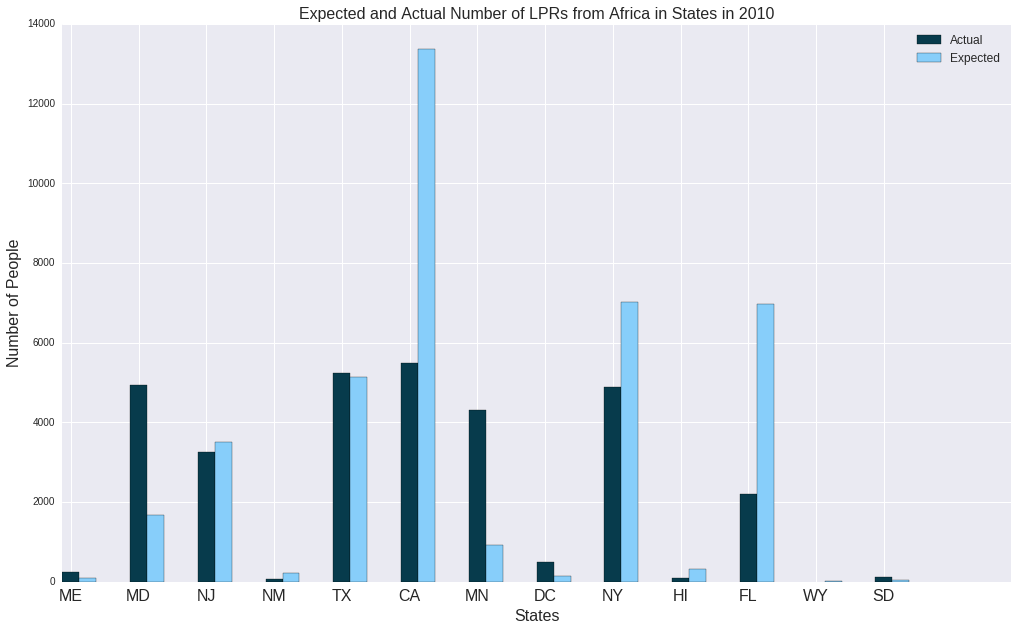

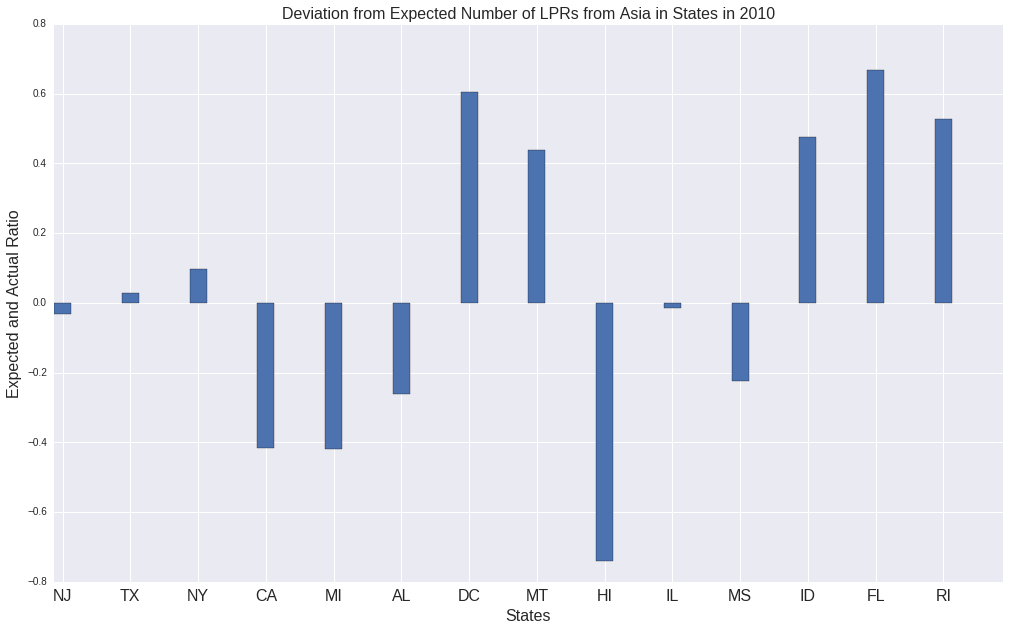

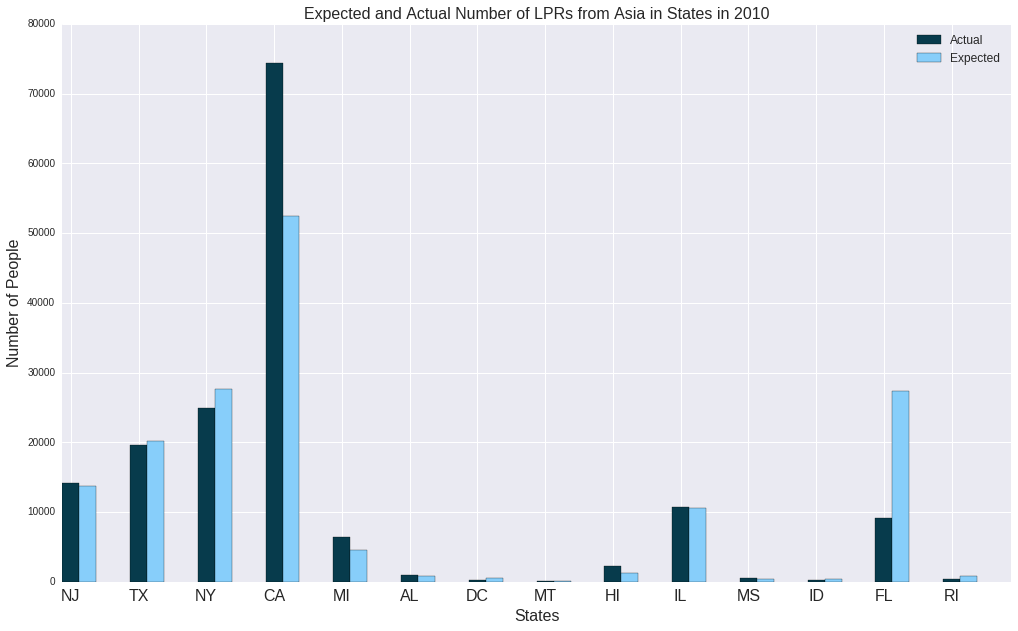

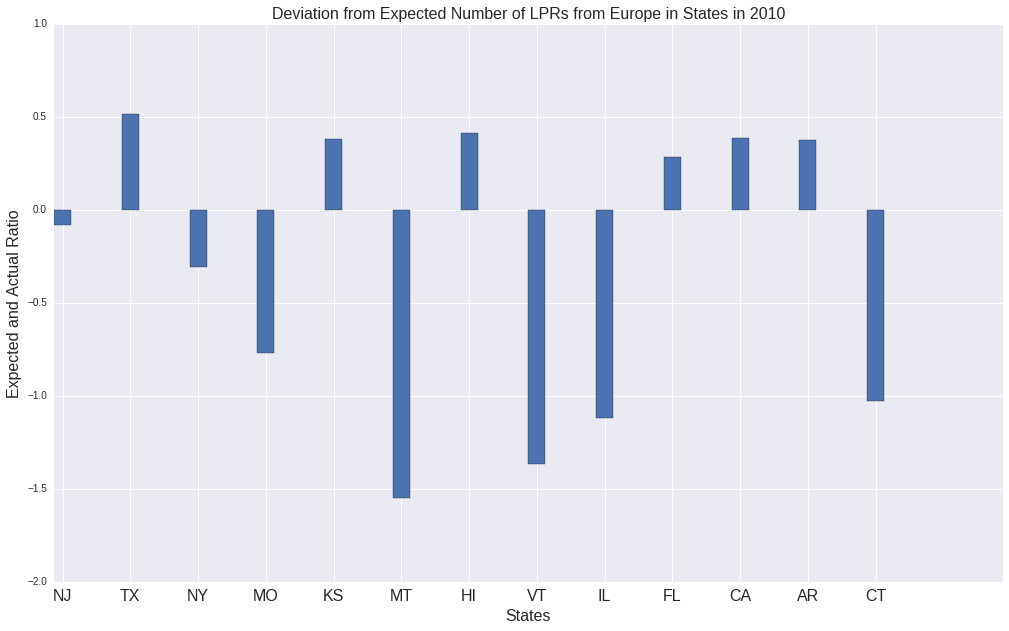

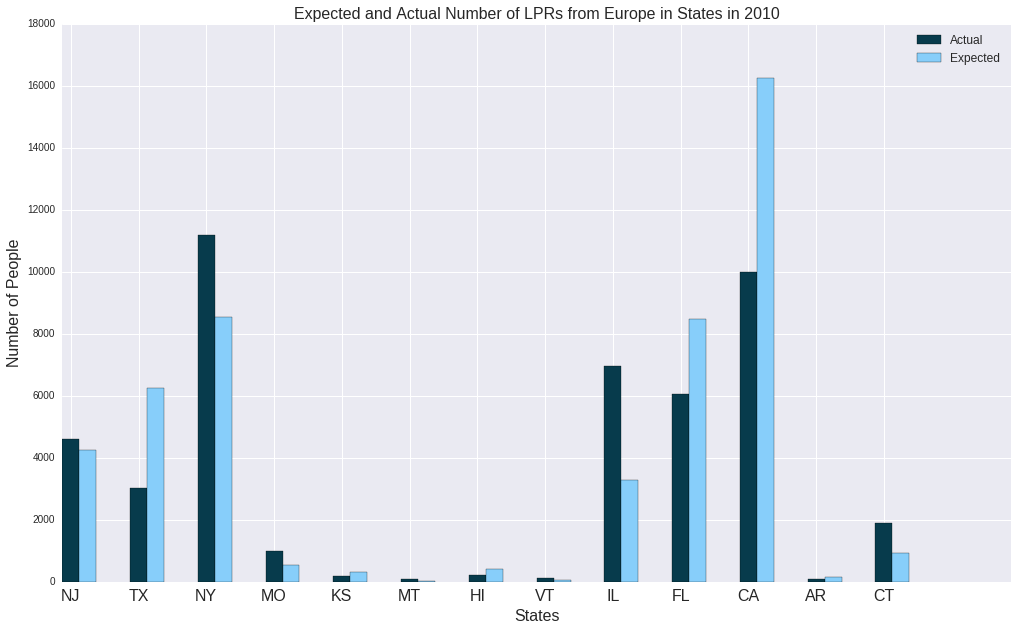

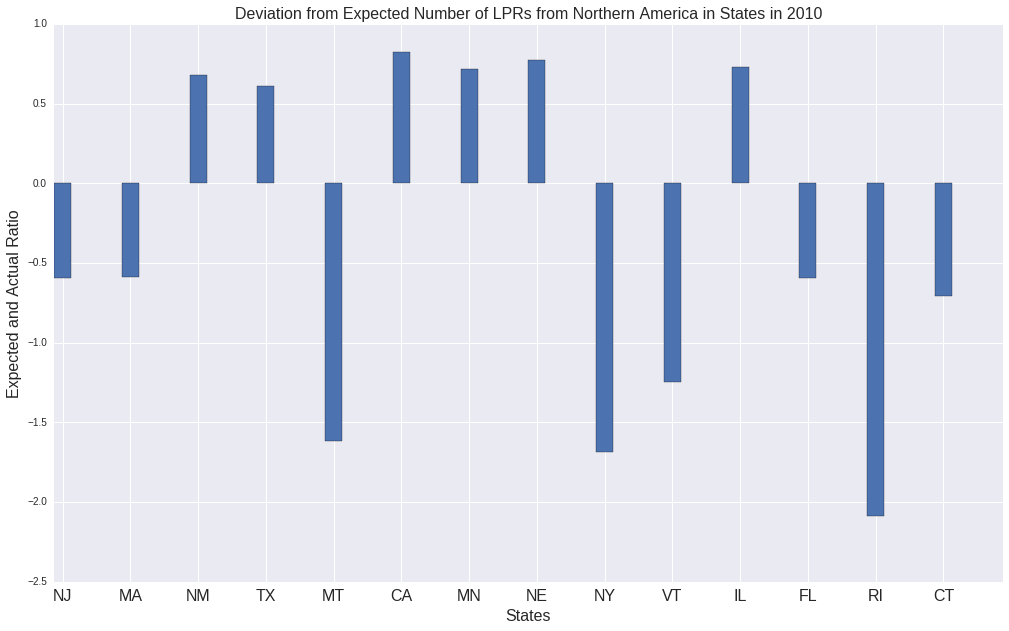

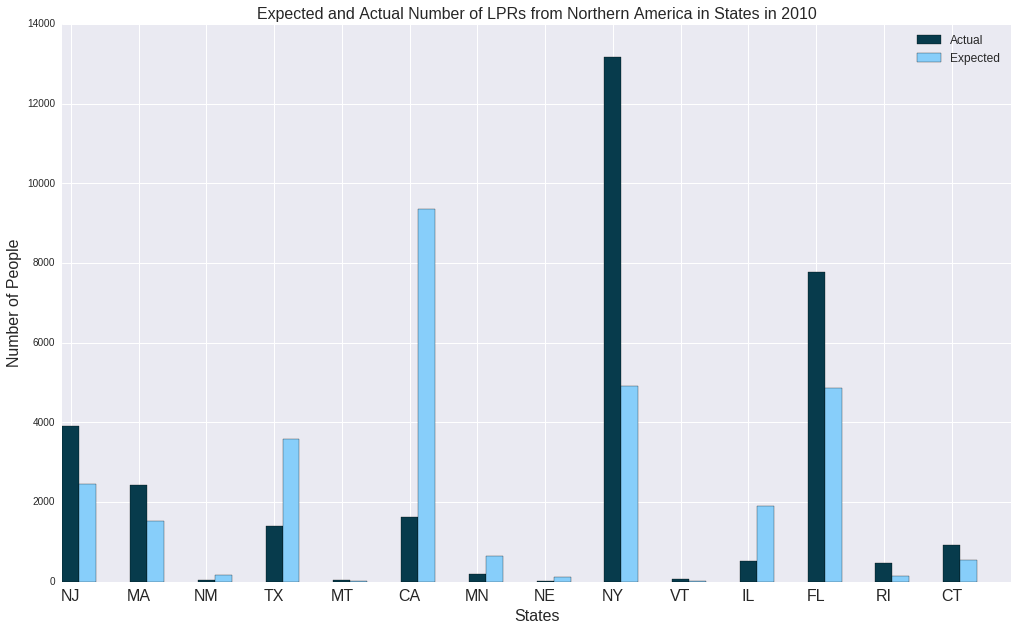

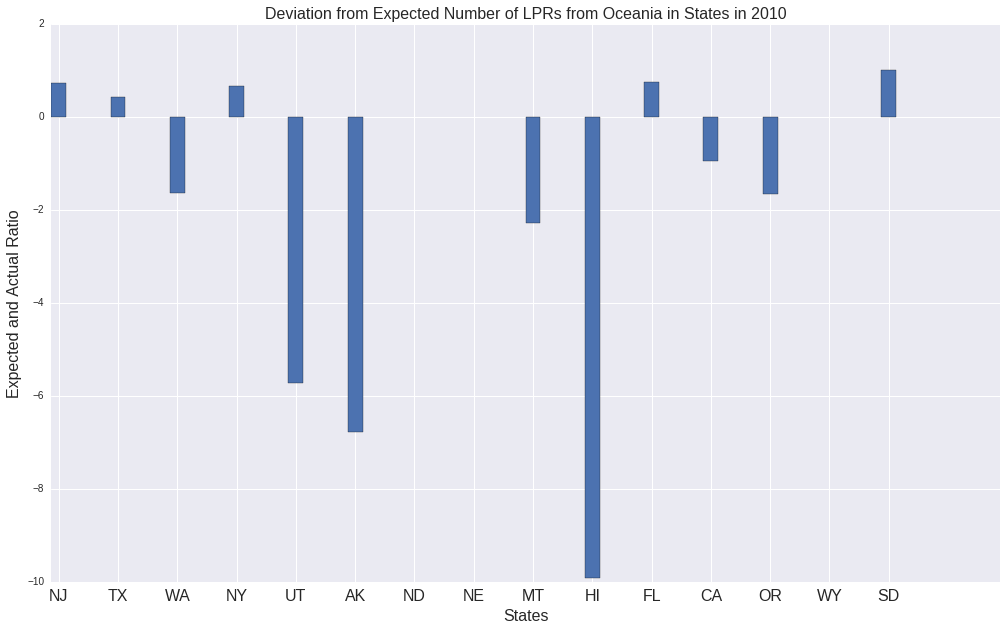

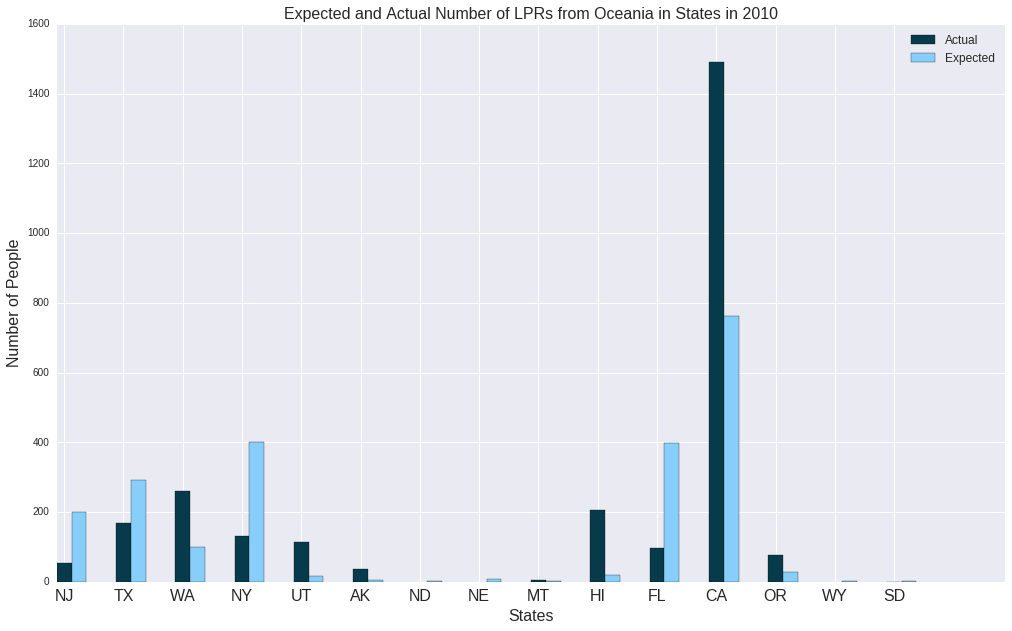

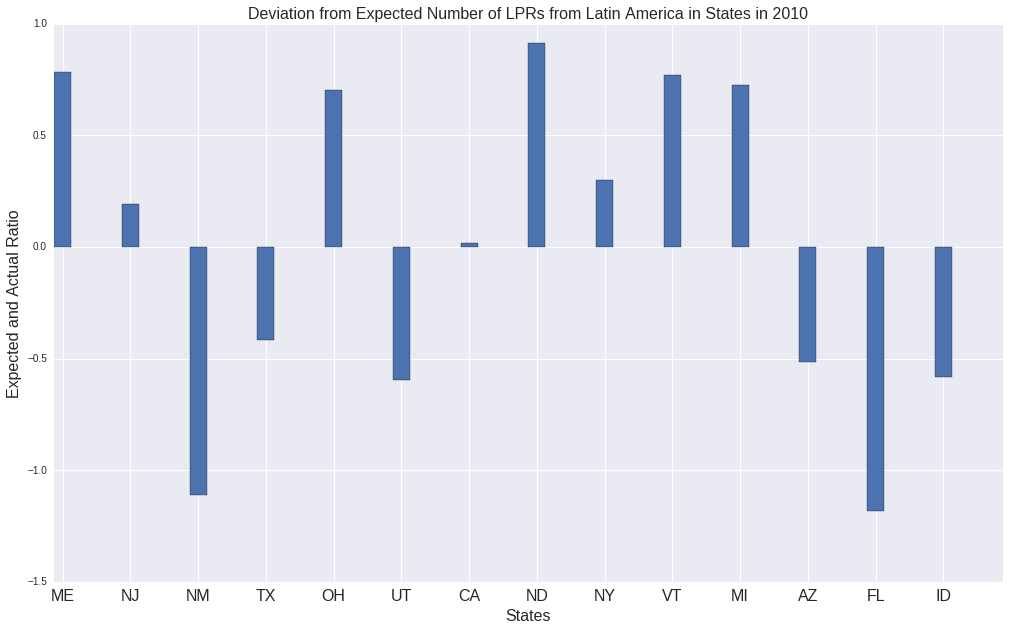

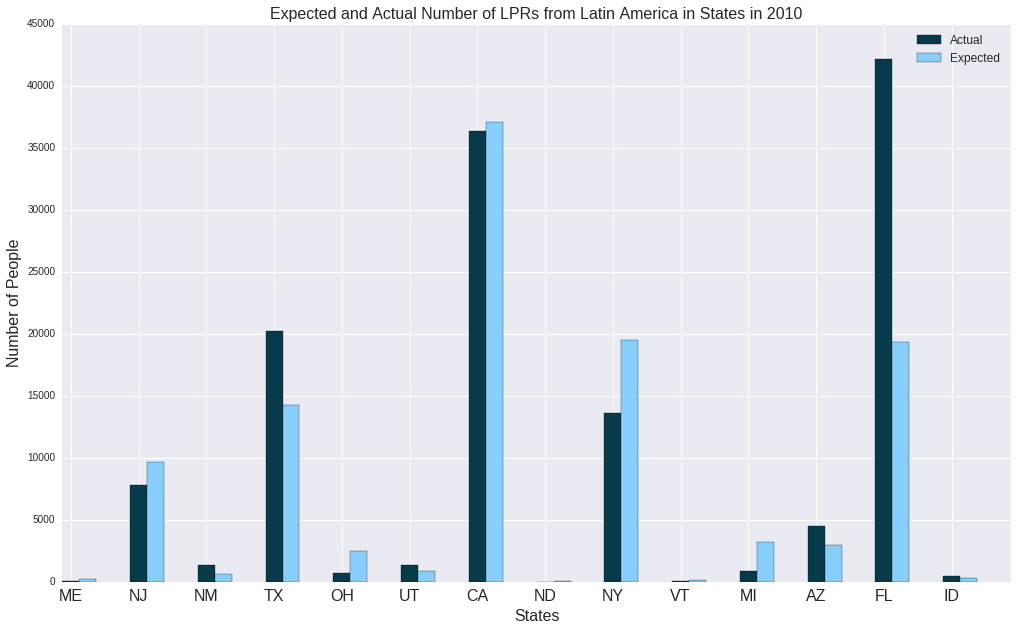

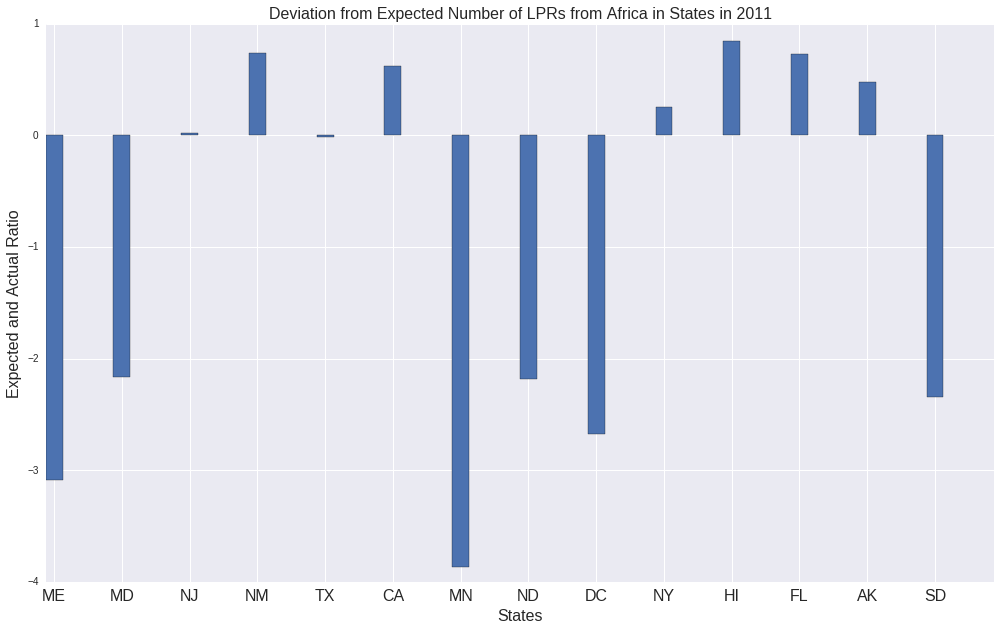

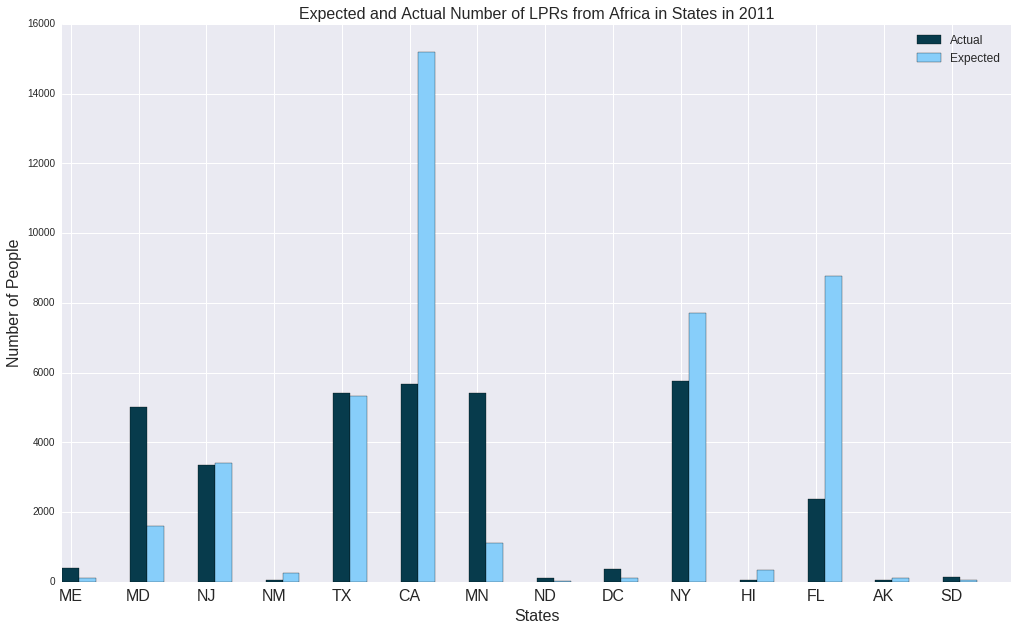

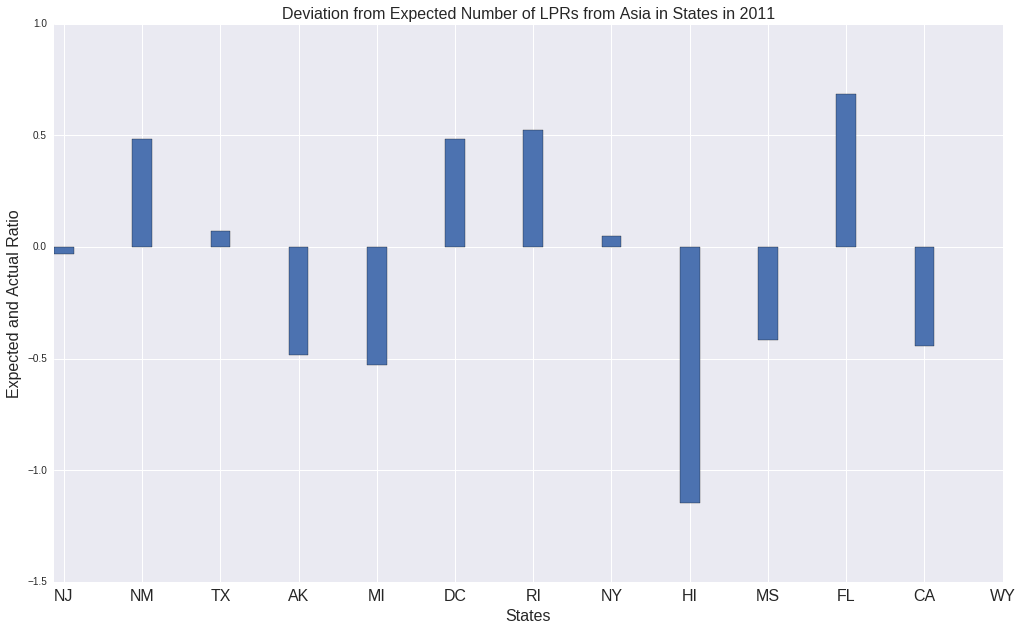

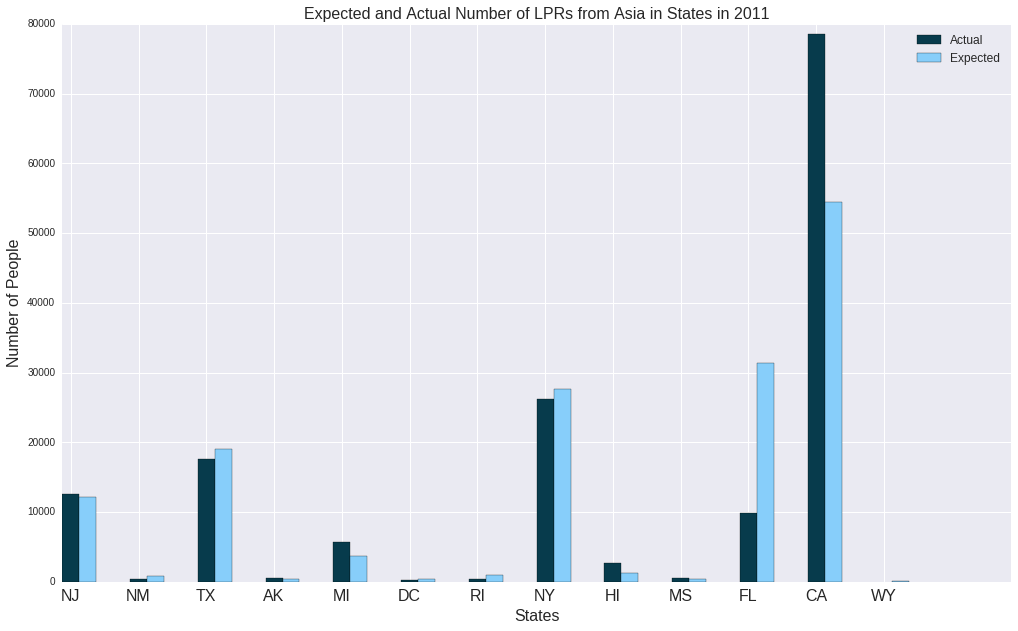

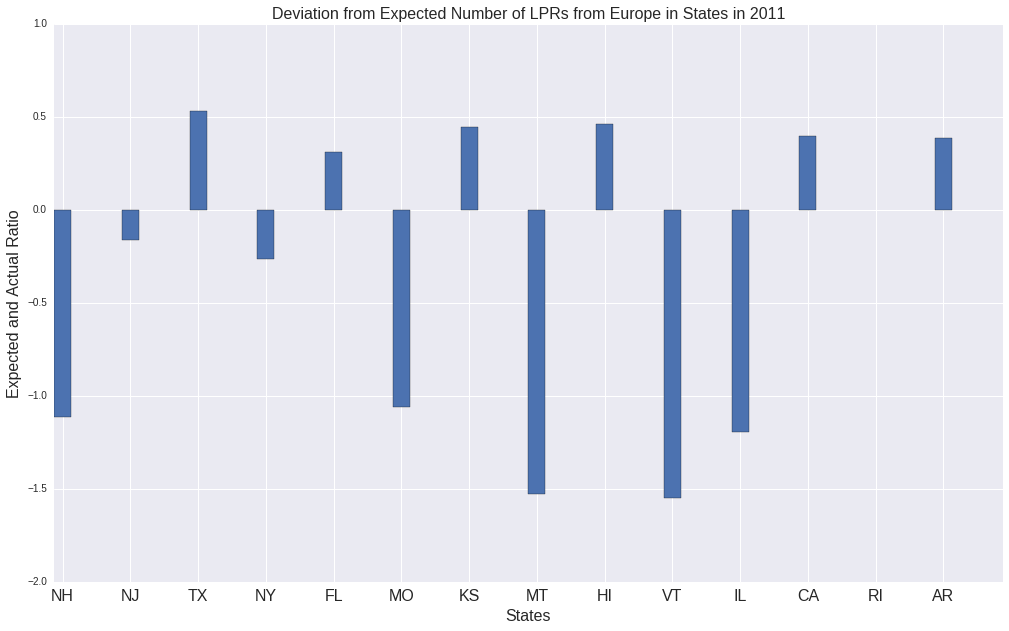

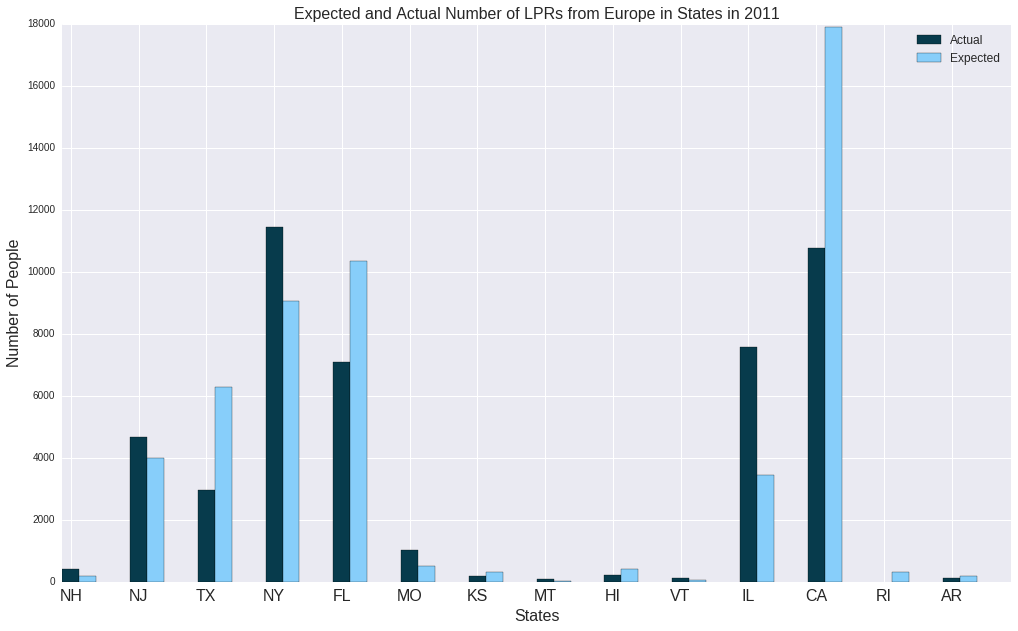

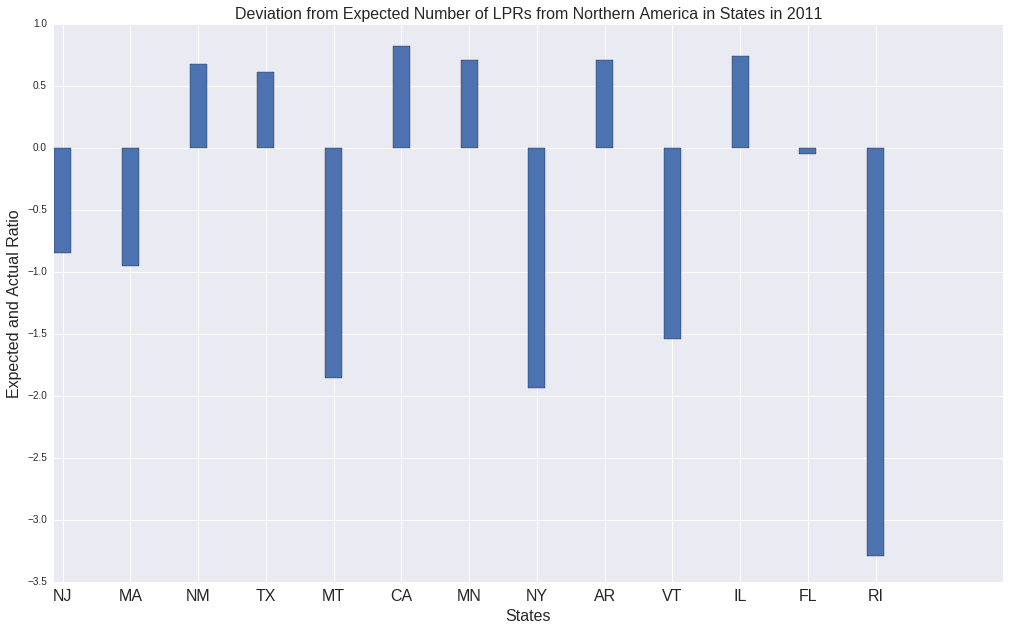

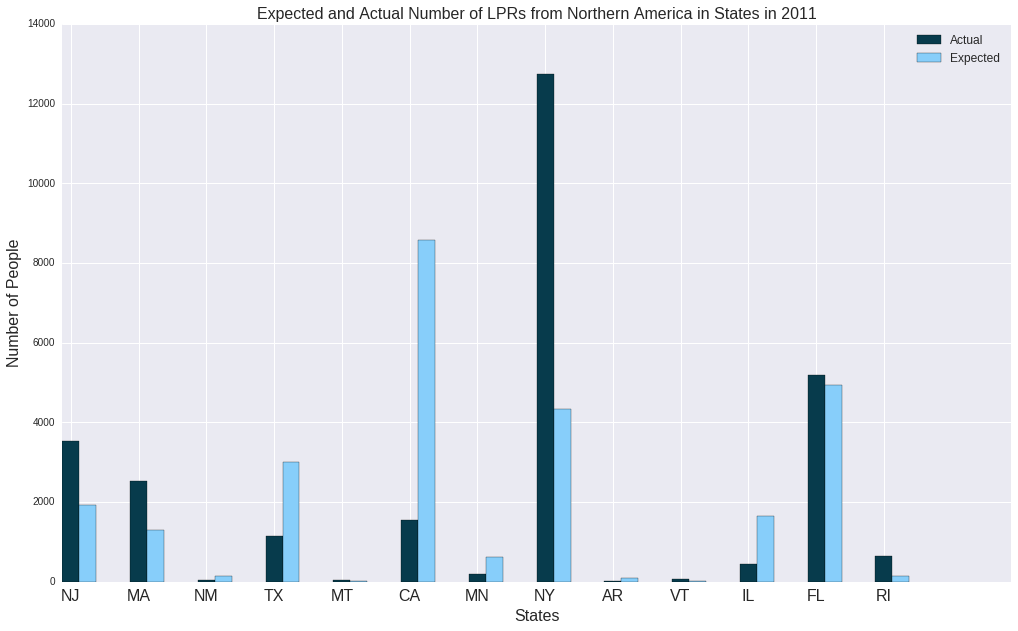

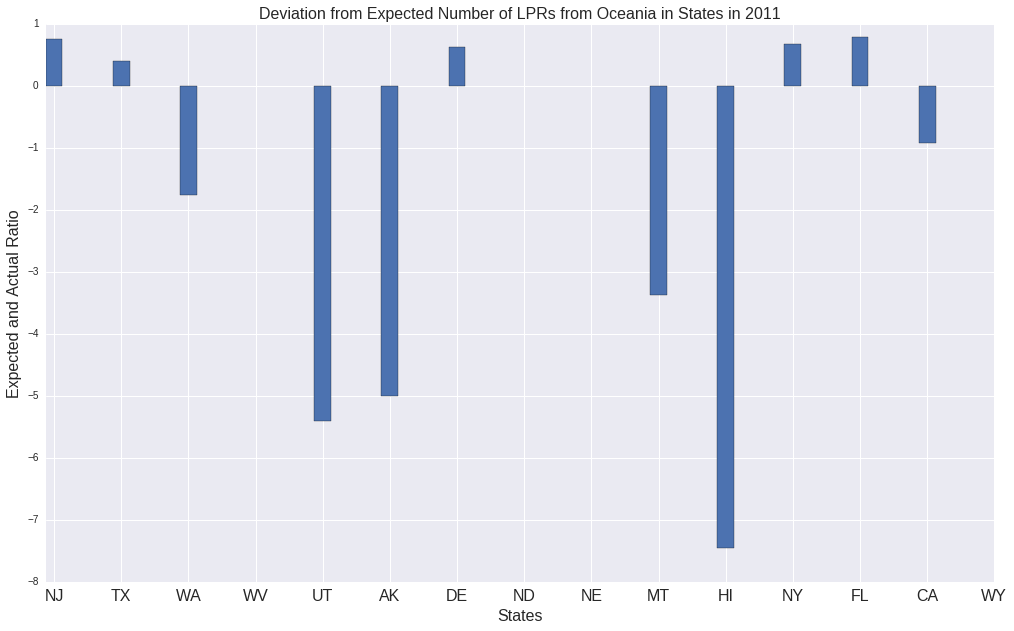

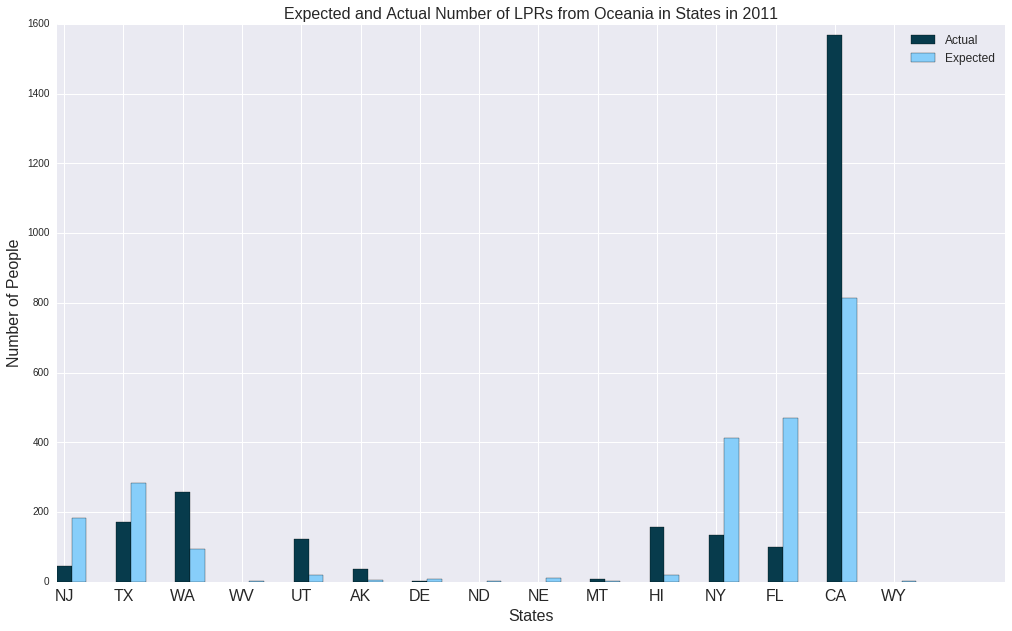

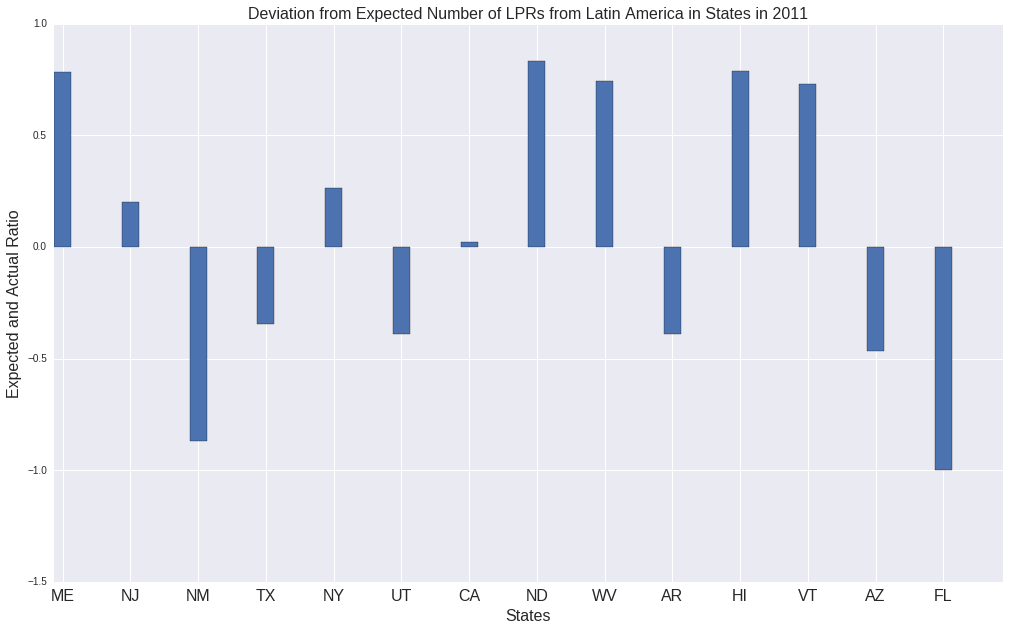

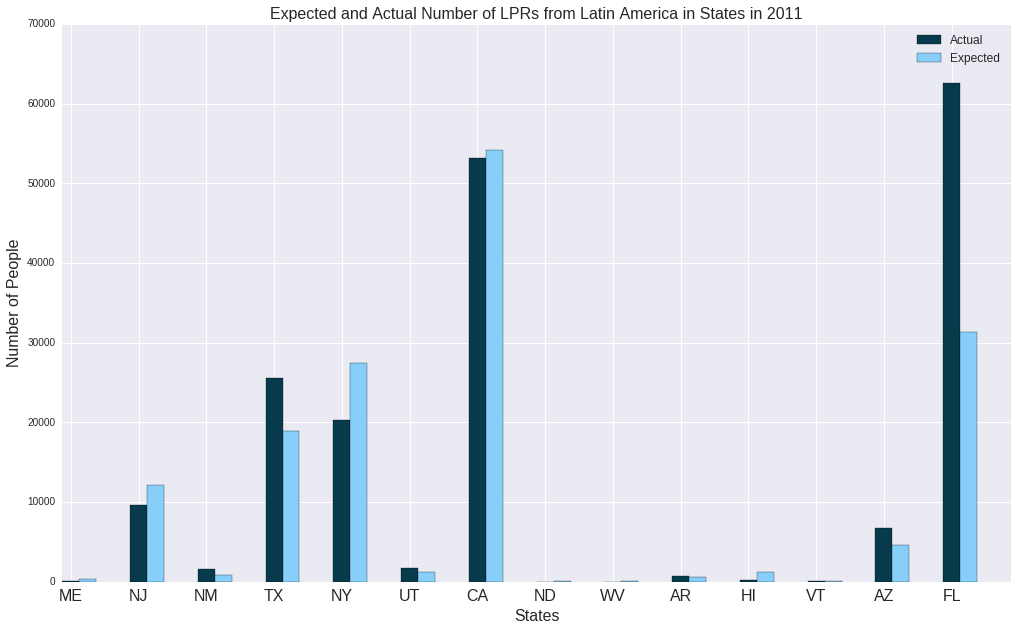

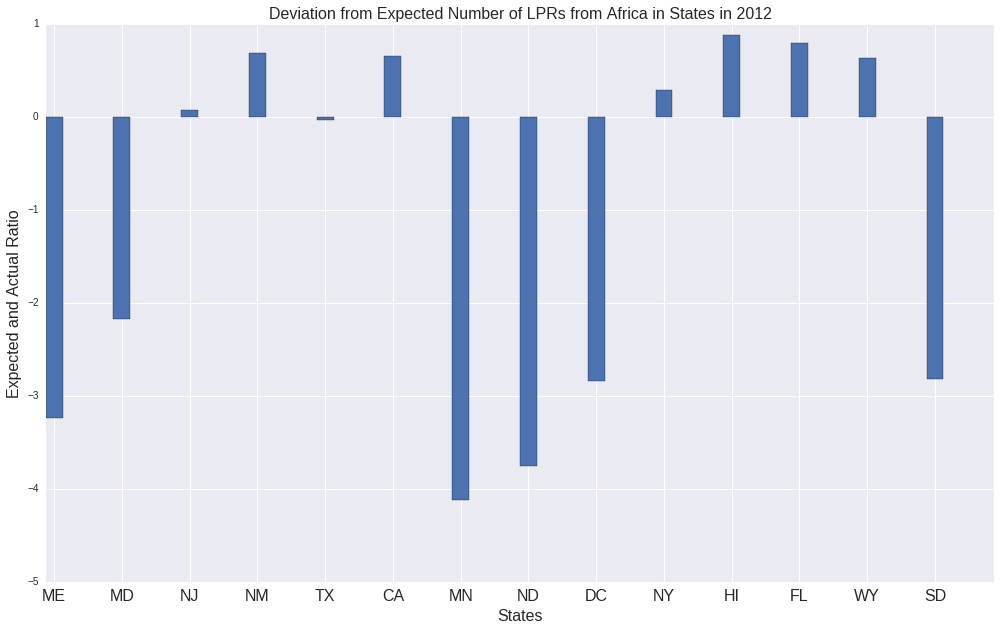

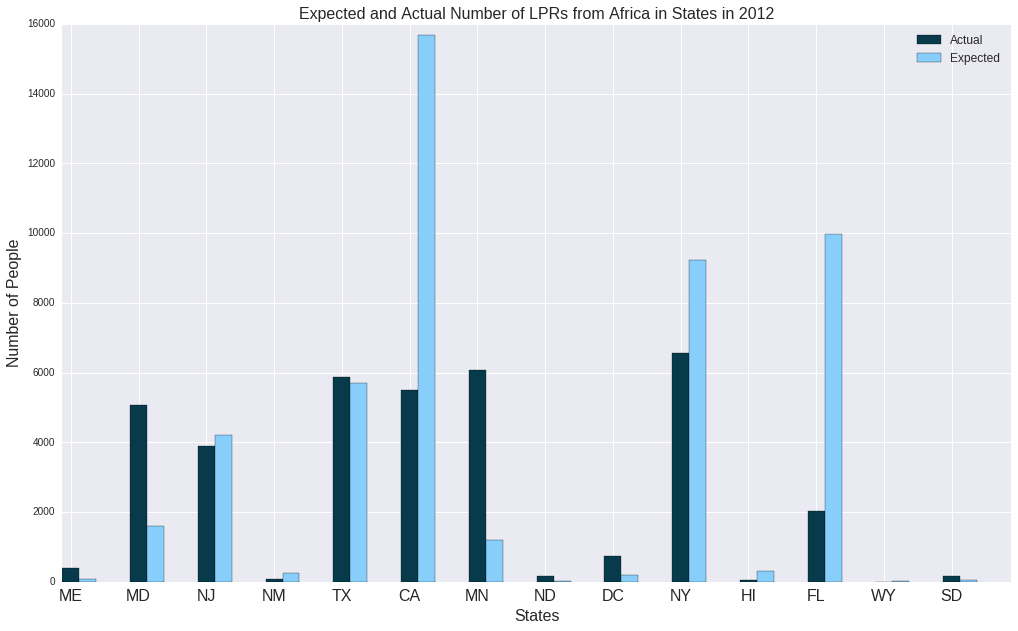

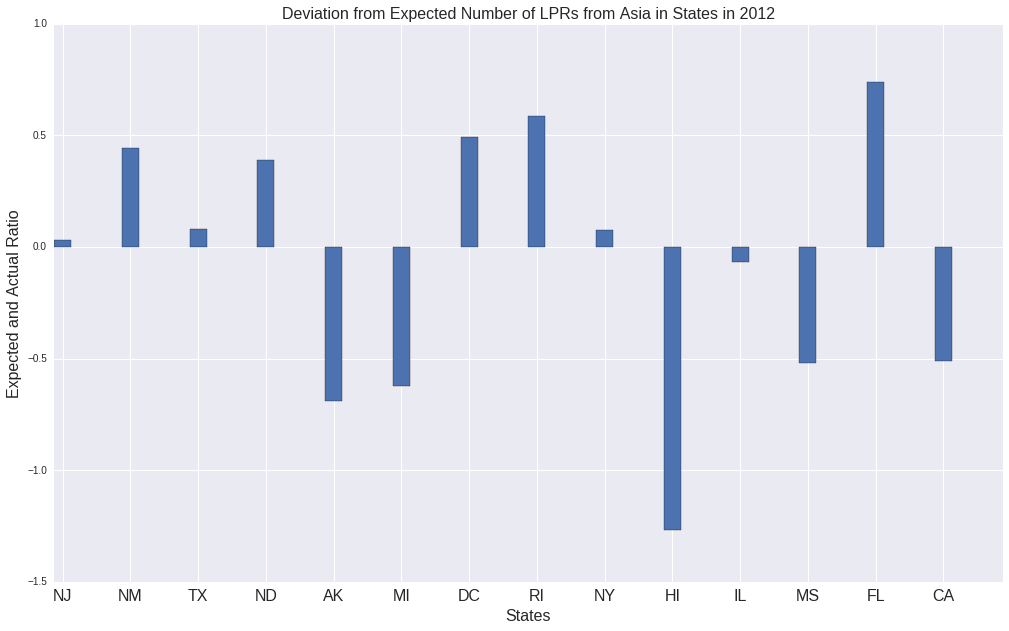

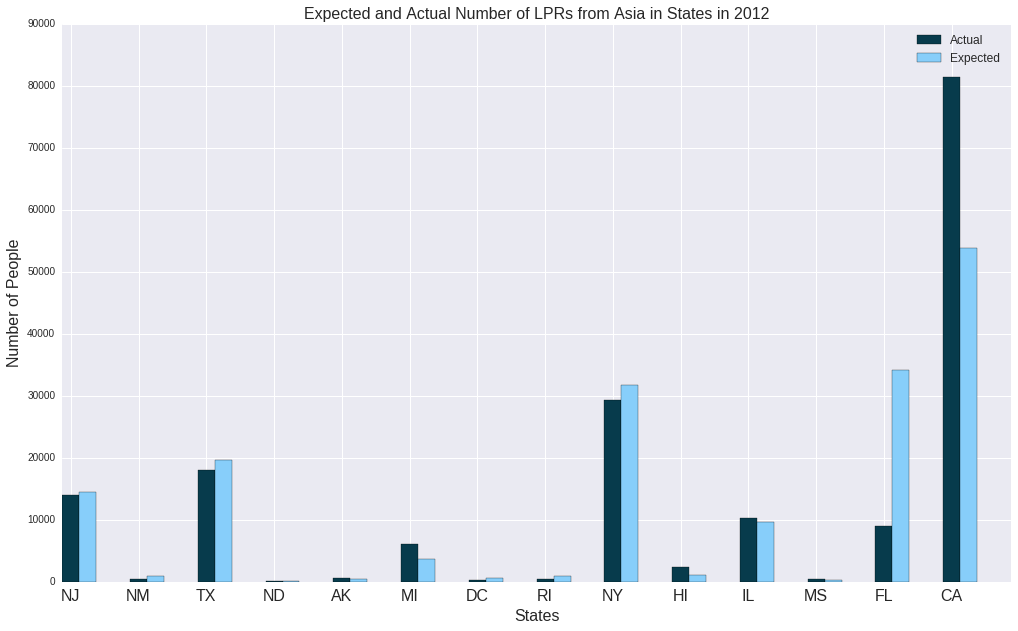

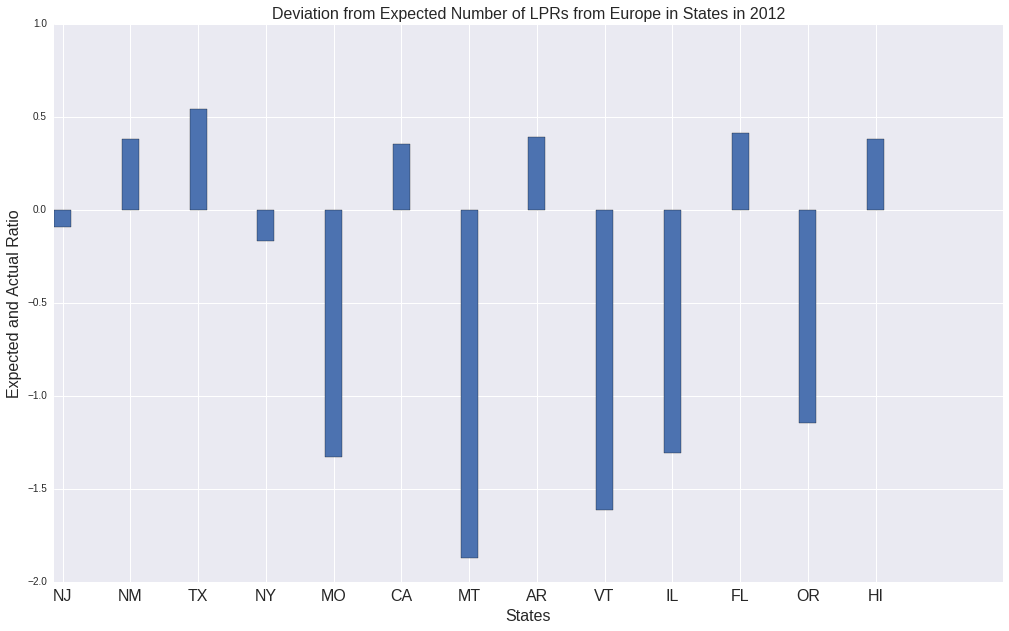

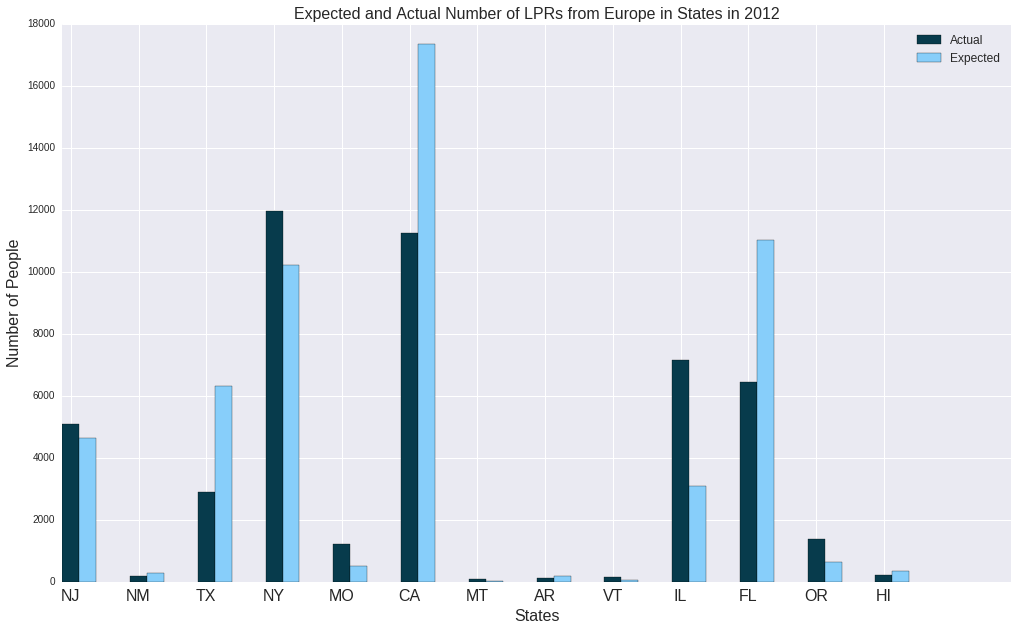

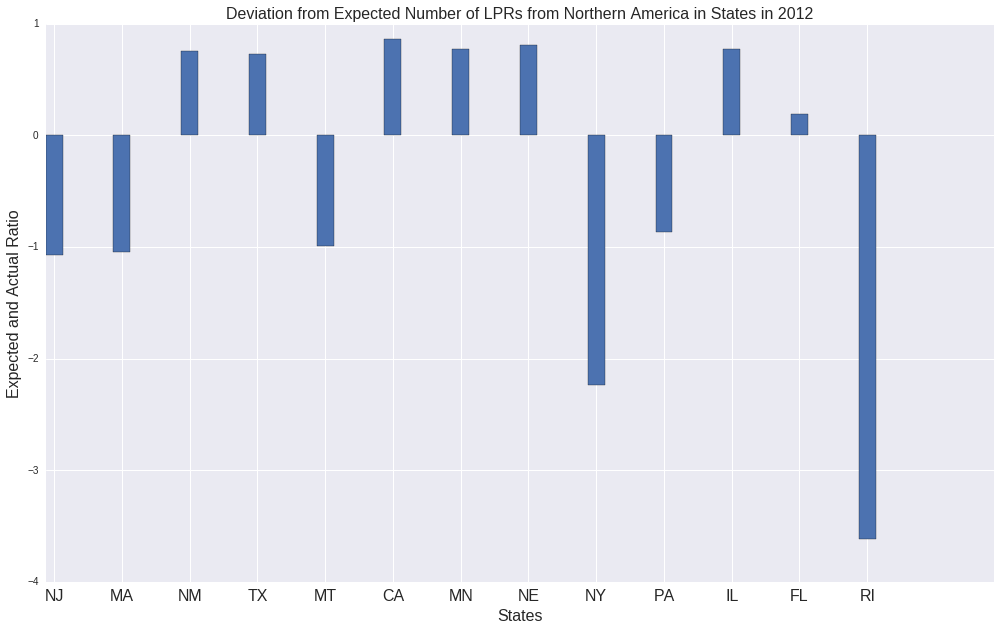

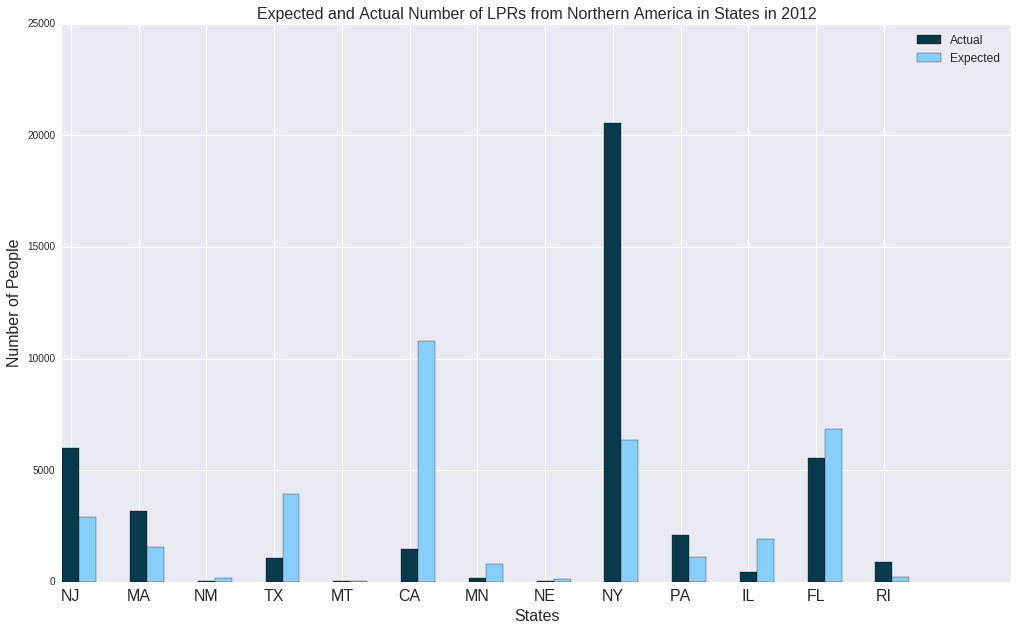

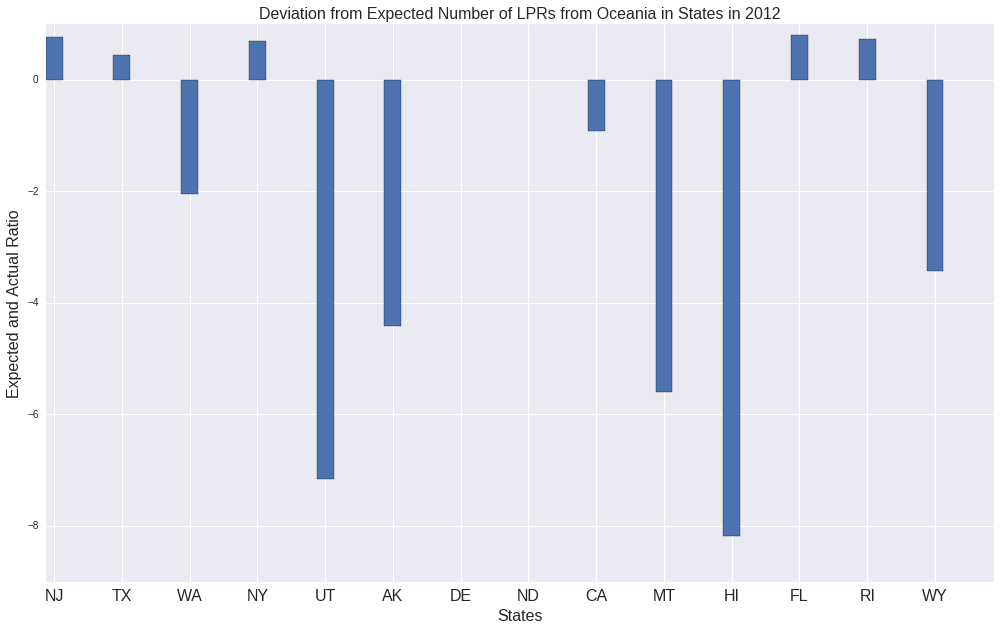

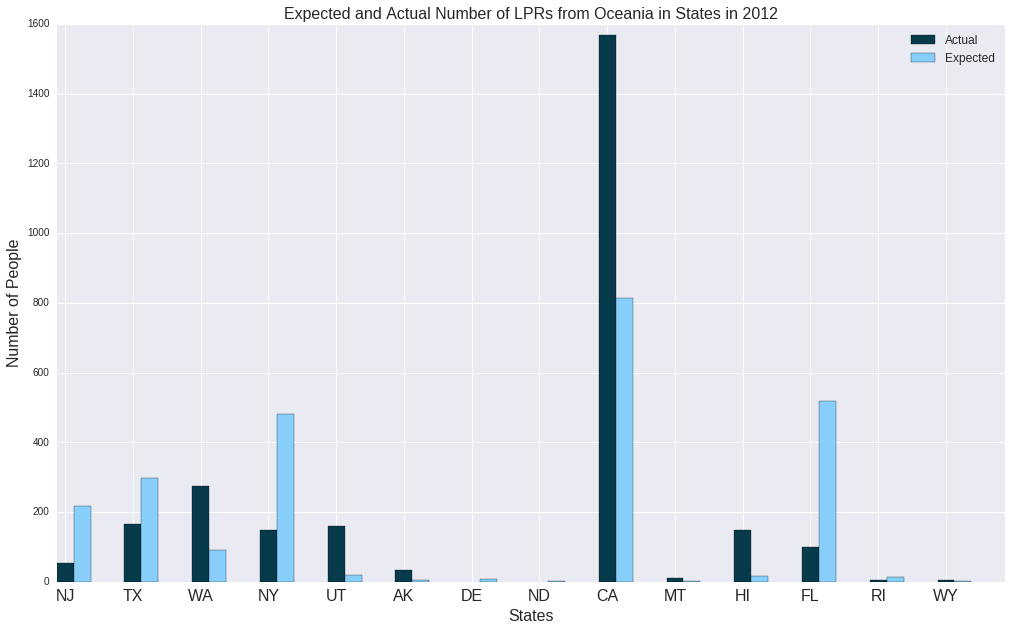

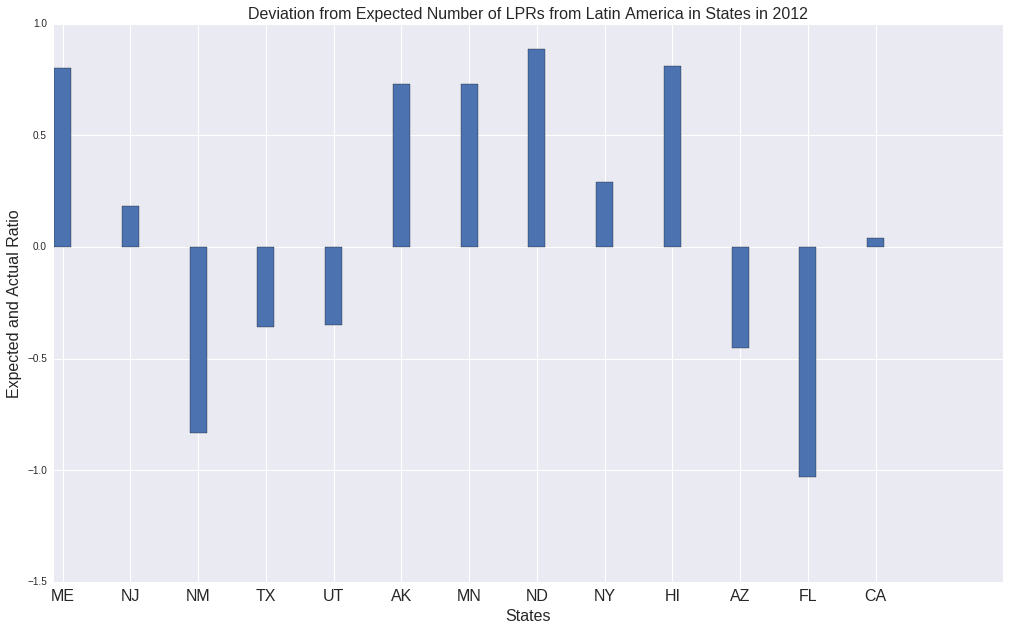

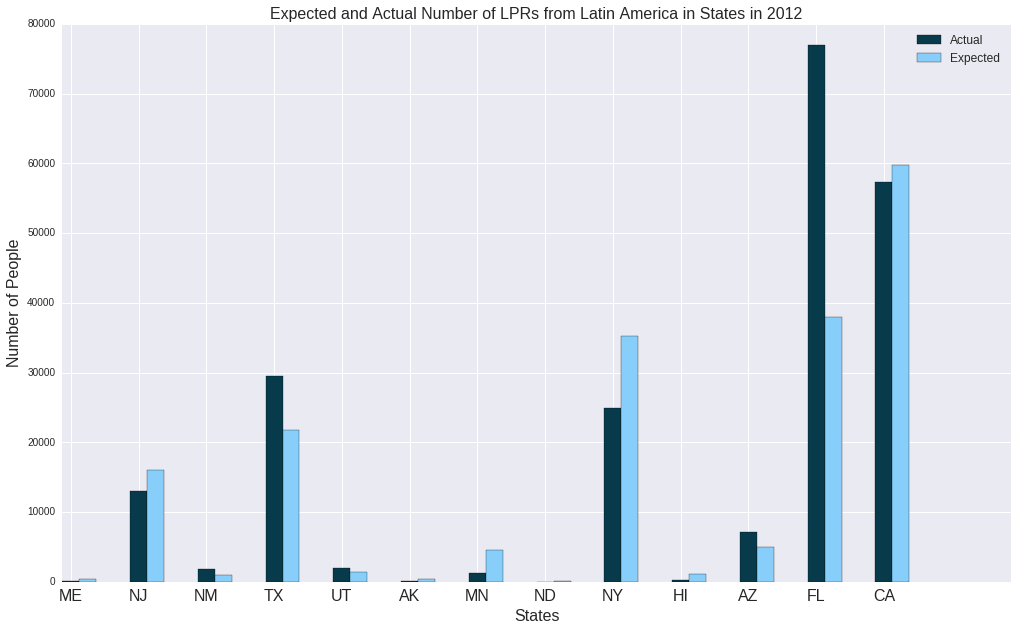

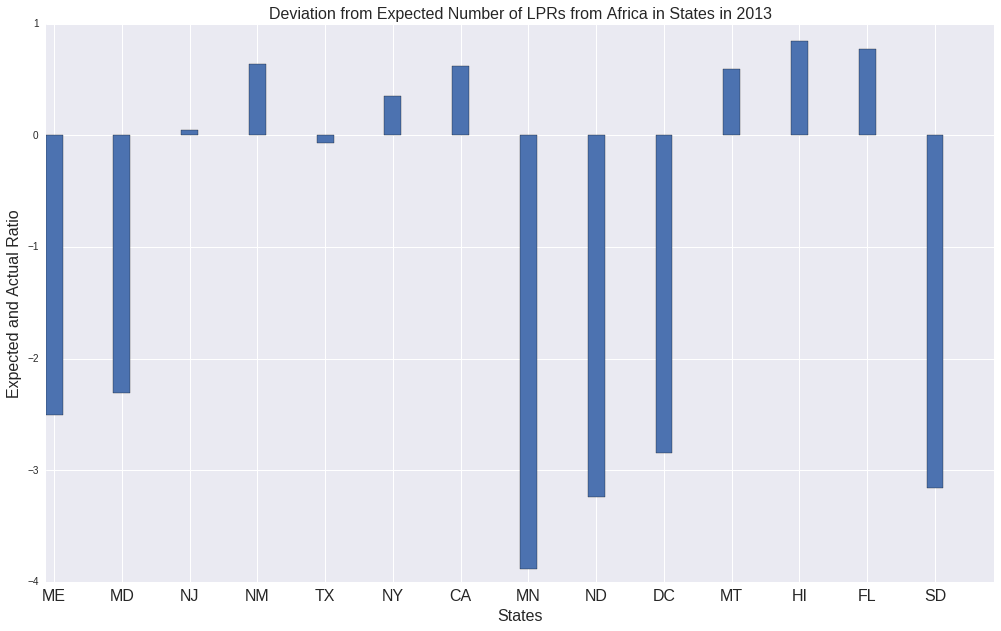

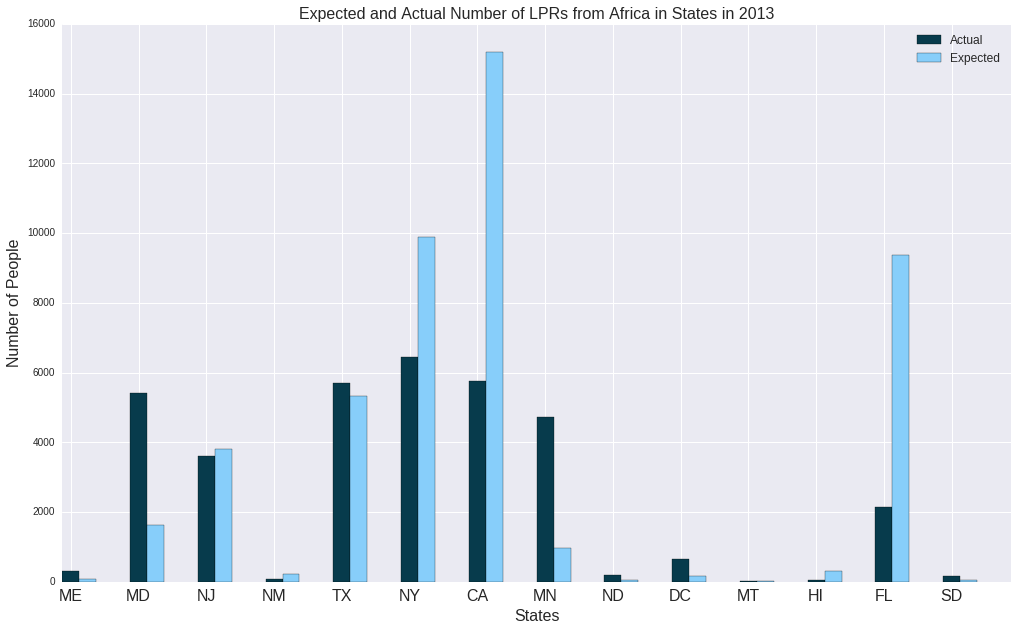

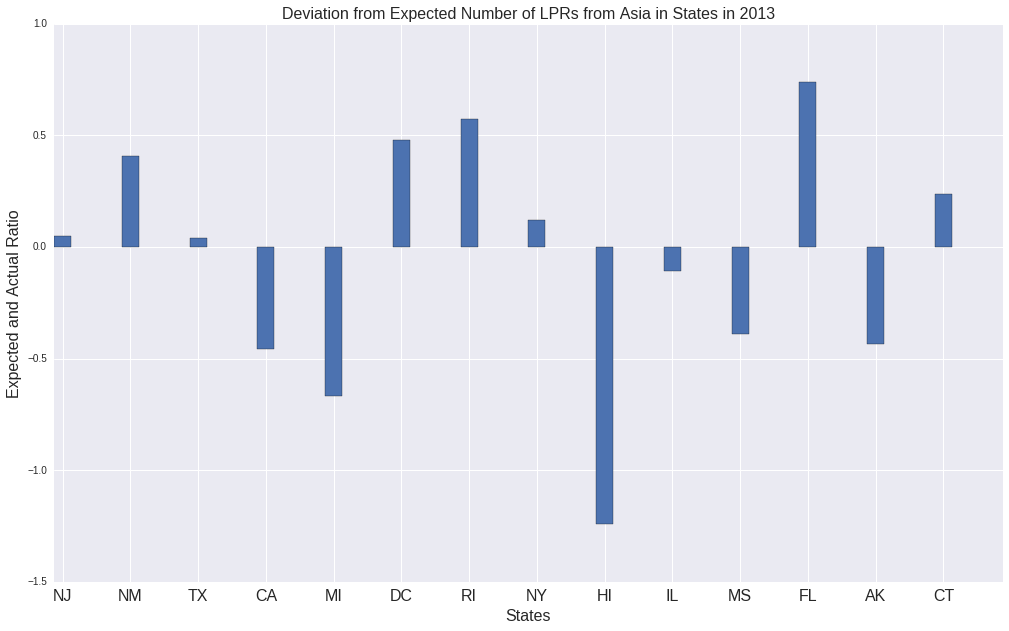

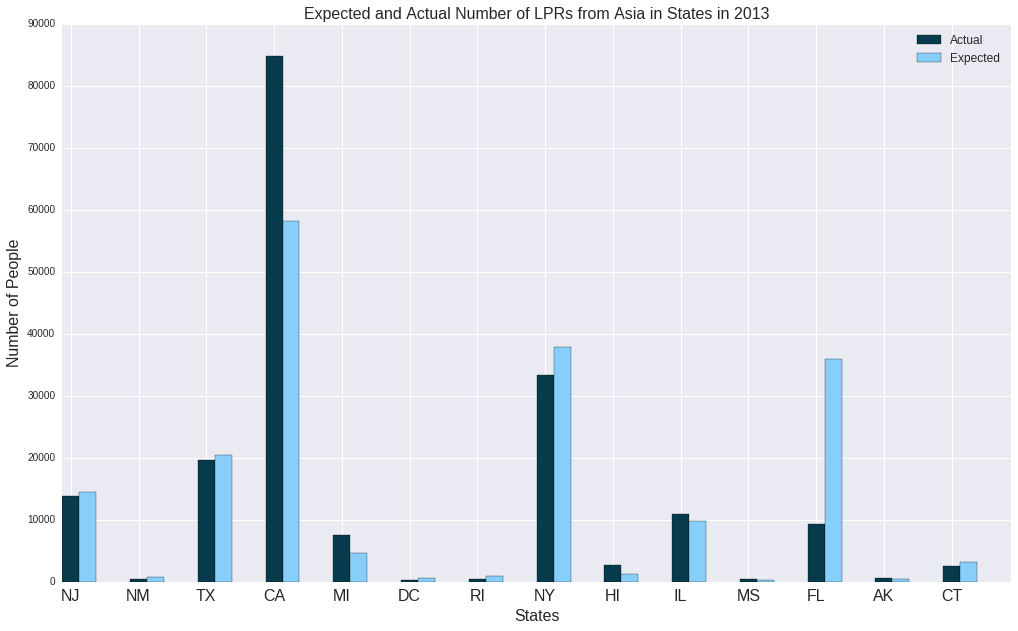

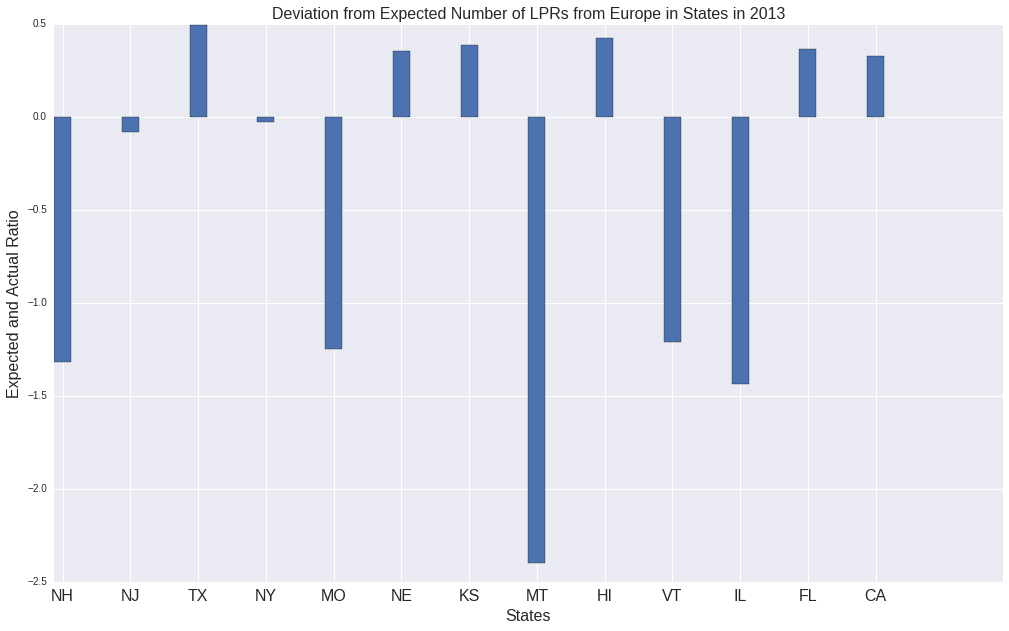

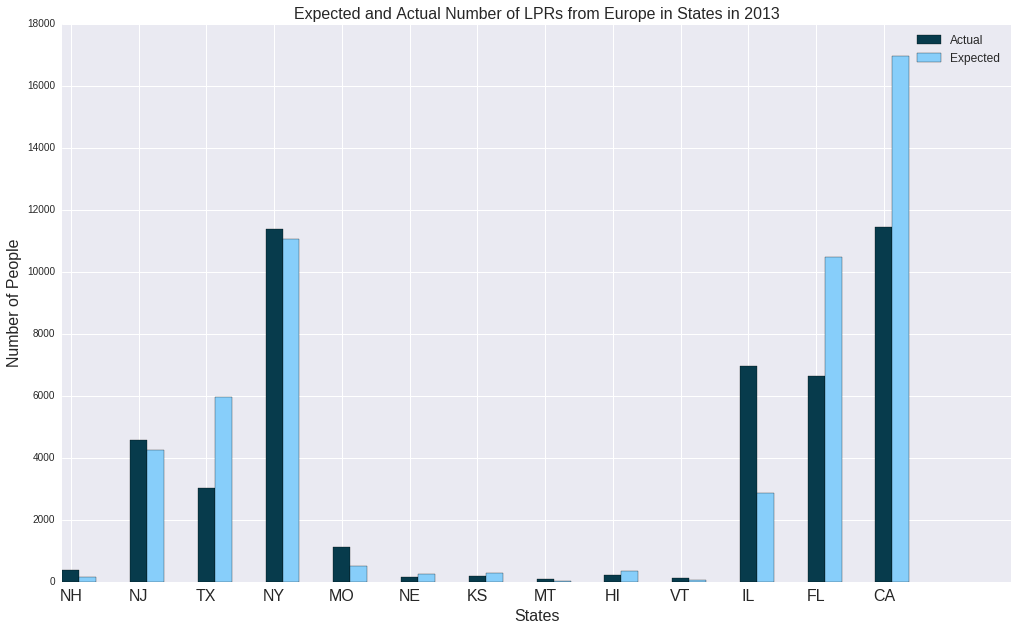

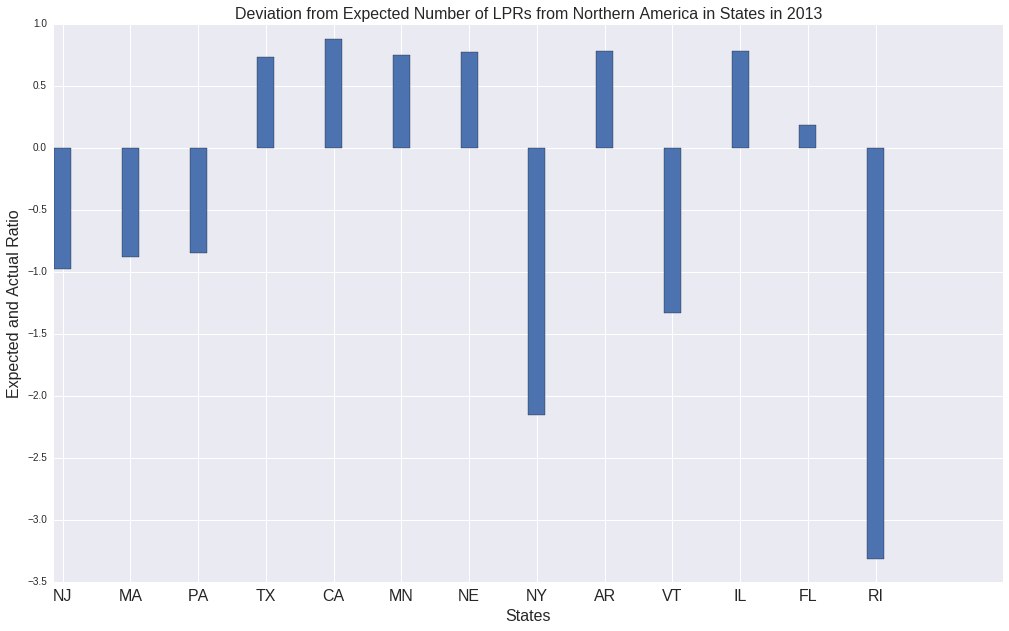

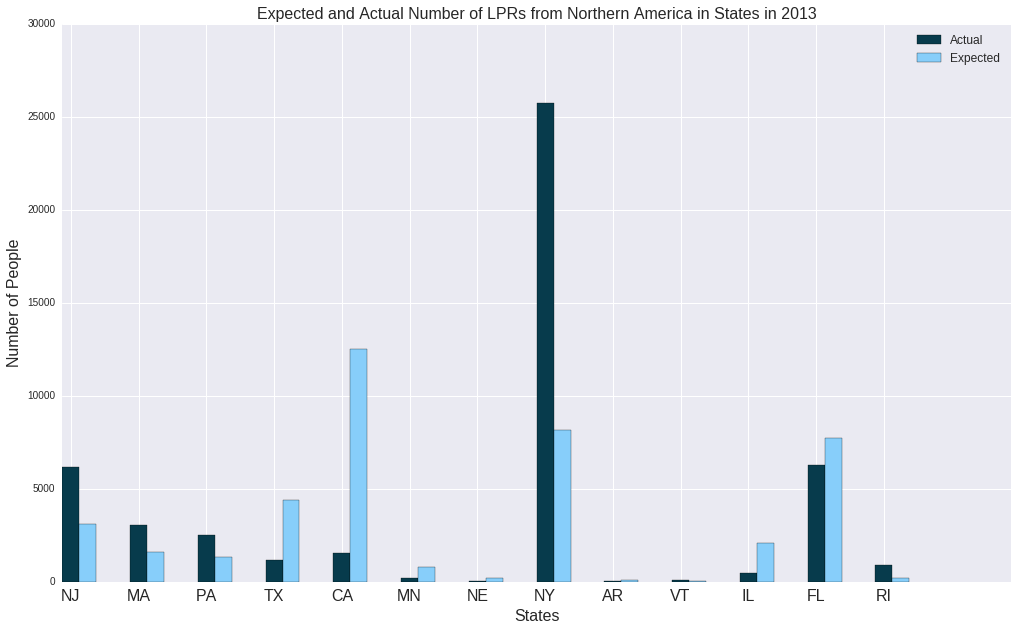

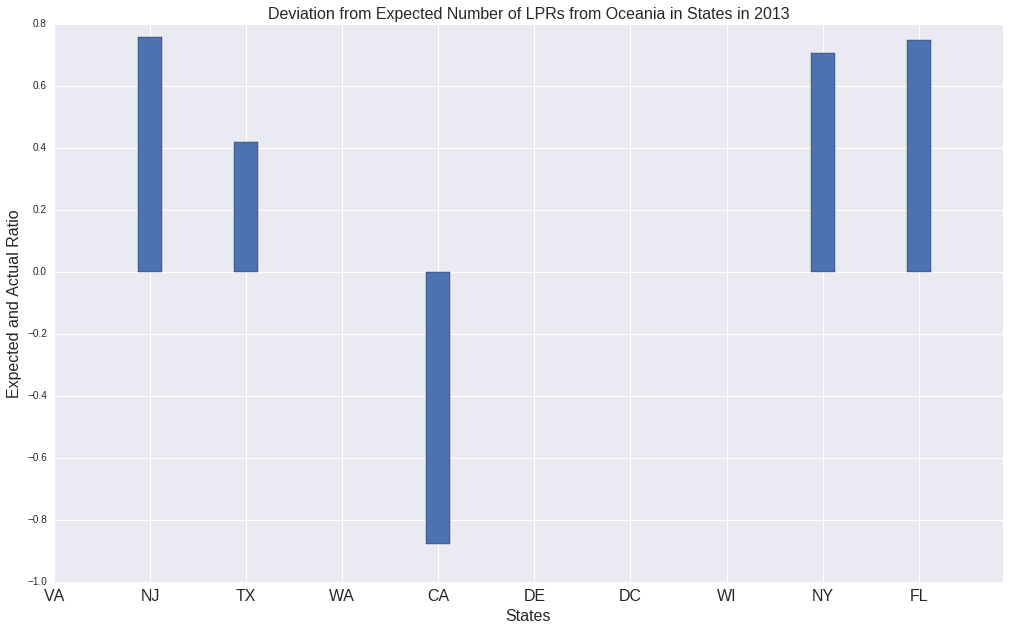

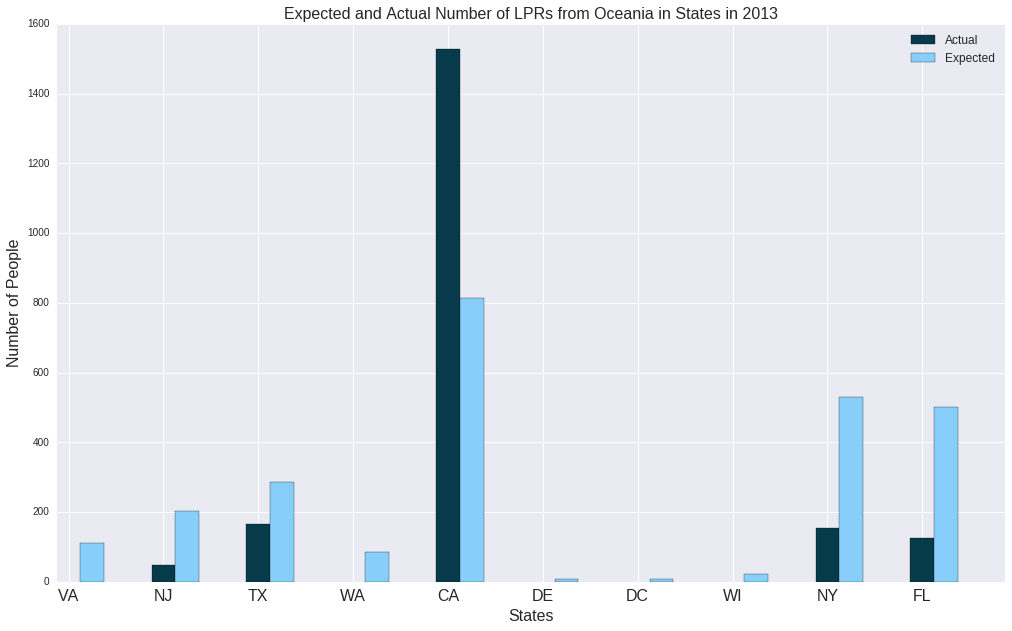

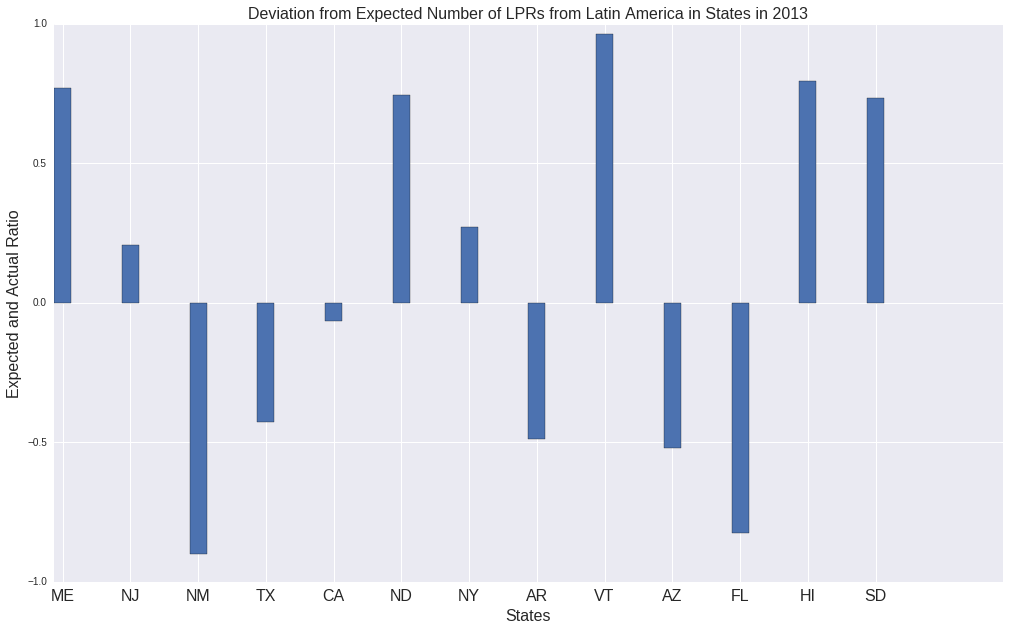

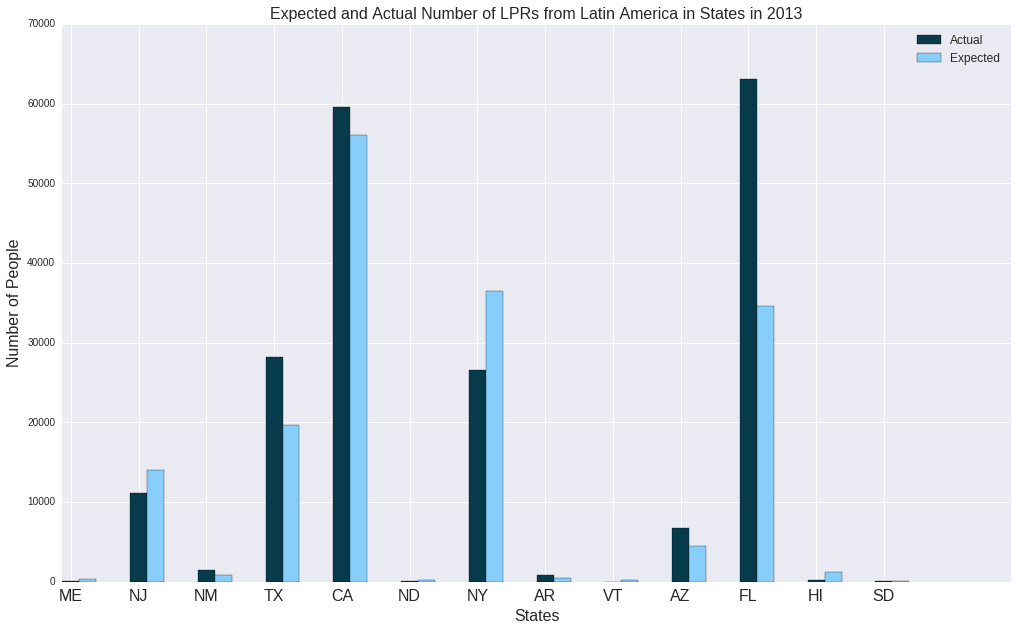

In [61]:
for year,region in years_series.iteritems():
    if year < 4:
        yr = '200'+str(year+6)
    else:
        yr = '20'+str(year+6)
    
    for r,states in region.iteritems():
        high_act = sorted(states, key=lambda k: states[k][0],reverse=True)[:5]
        high_exp = sorted(states, key=lambda k: states[k][1],reverse=True)[:5]
        high_act_exp = sorted(states, key=lambda k: states[k][2])[:5]
        high_exp_act = sorted(states, key=lambda k: states[k][2],reverse=True)[:5]
        
        highest = set(high_act_exp+high_exp_act+high_act+high_exp)
                
        p1 = bar_plot('errors',highest,regions[r],states,yr)
        p1.savefig('img/nat'+str(yr)+'_'+regions[r]+'_error.png')
        
        p2 = bar_plot('actexp',highest,regions[r],states,yr)
        p2.savefig('img/nat'+str(yr)+'_'+regions[r]+'_actexp.png')
        
        print p1,p2

In [62]:
print states['WY']

[92.0, 82.274458316077485, -0.11820851674962676]
